# Model Uses KMeans Clustering 
# Splits Data into 3 Categories
# the Splitting of Customer is based on Max Transaction , Min Transaction , Mean Transaction , Sum(Transaction)
# Credit => +1 * Tran Amount 
# Debit => -1 * Tran Amount

In [1]:
import pandas as pd
import numpy as np
import os

In [4]:
os.listdir('H2H')

['.DS_Store',
 'customer_account_mapping.csv',
 'mcc_codes.csv',
 'transaction_categories_list.csv',
 'cards_transaction_code_description.csv',
 'casa_transaction_code_description.csv',
 'README.txt',
 'model_development',
 'testing.zip']

In [6]:
df_cust_map = pd.read_csv('H2H/customer_account_mapping.csv')
df_mcc_code = pd.read_csv('H2H/mcc_codes.csv')
df_tran_lst = pd.read_csv('H2H/transaction_categories_list.csv')
df_card_tran_disc = pd.read_csv('H2H/cards_transaction_code_description.csv')
df_casa_tran_disc = pd.read_csv('H2H/casa_transaction_code_description.csv')

In [7]:
df_cust_map

,as_of_date,acct_id,acct_hold_type,acct_status,party_id
0,14/06/2021,7E32B2D726E82917E7D1C23BBF01F4400F98151F,OTHR_PTE_INDIV_HSHLD,ACTIVE,726E82917E7D1C23BBF01F4400
1,14/06/2021,F69FD9F2322146B63EADF56422717CA144694326,OTHR_PTE_INDIV_HSHLD,ACTIVE,2322146B63EADF56422717CA14
2,14/06/2021,F9FA2B456BBAD4EED57EADA5419FA44C33635E2F,OTHR_PTE_INDIV_HSHLD,ACTIVE,56BBAD4EED57EADA5419FA44C3
3,14/06/2021,921B91C5179C8CE85205F10555B7C34E6F523D7F,OTHR_PTE_INDIV_HSHLD,ACTIVE,5179C8CE85205F10555B7C34E6
4,14/06/2021,C37322C6678977D2D2FA44392785792E3CB3A54C,OTHR_PTE_INDIV_HSHLD,ACTIVE,6678977D2D2FA44392785792E3
...,...,...,...,...,...
515,14/06/2021,C67CF47B857B0D044FF7174FF8F9512FE6FD1C71,OTHR_PTE_INDIV_HSHLD,ACTIVE,B857B0D044FF7174FF8F9512FE
516,14/06/2021,2F1C4462A5C0B9615FC3A68B70B6C8FC0A03C579,OTHR_PTE_INDIV_HSHLD,ACTIVE,2A5C0B9615FC3A68B70B6C8FC0
517,14/06/2021,121D59ADF9754FD848F922E288E8E9C541A41FD3,OTHR_PTE_INDIV_HSHLD,ACTIVE,DF9754FD848F922E288E8E9C54
518,14/06/2021,8368106098398A30E55A73F658B0BEBDF9C1DAD7,OTHR_PTE_INDIV_HSHLD,ACTIVE,098398A30E55A73F658B0BEBDF


In [8]:
df_mcc_code

,mcc,Mapped_category,edited_description,combined_description,usda_description,irs_description,irs_reportable
0,742,Household,Veterinary Services,Veterinary Services,Veterinary Services,Veterinary Services,Yes
1,763,Other,Agricultural Co-operatives,Agricultural Co-operatives,Agricultural Co-operatives,Agricultural Cooperative,Yes
2,780,Household,"Horticultural Services, Landscaping Services","Horticultural Services, Landscaping Services",Horticultural Services,Landscaping Services,Yes
3,1520,Household,General Contractors-Residential and Commercial,General Contractors-Residential and Commercial,General Contractors-Residential and Commercial,General Contractors,Yes
4,1711,Other,Air Conditioning Contractors – Sales and Insta...,Air Conditioning Contractors – Sales and Insta...,Air Conditioning Contractors – Sales and Insta...,"Heating, Plumbing, A/C",Yes
...,...,...,...,...,...,...,...
977,9405,Other,Intra – Government Transactions,Intra – Government Transactions,Intra – Government Transactions,U.S. Federal Government Agencies or Departments,No1.6041-3(p)(3)
978,9700,Other,Automated Referral Service ( For Visa Only),Automated Referral Service ( For Visa Only),Automated Referral Service ( For Visa Only),NaN,NaN
979,9701,Other,Visa Credential Service ( For Visa Only),Visa Credential Service ( For Visa Only),Visa Credential Service ( For Visa Only),NaN,NaN
980,9702,Other,GCAS Emergency Services ( For Visa Only),GCAS Emergency Services ( For Visa Only),GCAS Emergency Services ( For Visa Only),NaN,NaN


In [9]:
df_tran_lst

,Category Names
0,Cash Deposit
1,Cash Withdrawal
2,Check Deposit
3,Checks Posted
4,Credit Card Payments
5,Digital Wallet
6,Dining
7,Direct Debit & Standing Order
8,Direct Deposit
9,Donations


In [10]:
df_card_tran_disc

,acct_type,tran_code,description,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,702,1,LOCAL TRANSACTION,NaN,NaN,NaN,NaN
1,705,1,SALES DRAFT - LOCAL,NaN,NaN,NaN,NaN
2,780,1,SALES DRAFT - LOCAL,NaN,NaN,NaN,NaN
3,702,2,FOREIGN TRANSACTION,NaN,NaN,NaN,NaN
4,705,2,SALES DRAFT - FOREIGN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1350,705,9024,FIN CHGS DEFERRED DEBIT IN,NaN,NaN,NaN,NaN
1351,780,9024,FIN CHGS DEFERRED DEBIT IN,NaN,NaN,NaN,NaN
1352,702,9656,CO SUBSIDY EARNED IN,NaN,NaN,NaN,NaN
1353,702,9952,MEMBERSHIP FEE REFUND,NaN,NaN,NaN,NaN


In [11]:
df_casa_tran_disc

,tran_code,description
0,ABHP,Bill Payment to Abwin Hire Purchase
1,ABW,Bill Payment to Abwin Insurance
2,AC,Administrative Charge
3,ACCT,ATM CashCard or FlashPay Top Up
4,ACO / ACOE,Cashier's Order Equivalent
...,...,...
809,34ISS,SAF Loan to Bank Issuance
810,34MSC,SAF Loan to Bank Miscellaneous
811,34PAY,SAF Loan to Bank Payment
812,34POA,SAF Loan to Bank Payment of Acceptance


In [12]:
os.listdir('H2H/model_development/')

['cards_data.csv', 'casa_data.csv']

In [13]:
df_cards_data = pd.read_csv('H2H/model_development/cards_data.csv')
df_casa_data = pd.read_csv('H2H/model_development/casa_data.csv')

/Users/klrao/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
df_cards_data

,as_of_date,ACCT_ID,acct_type,acct_sub_type,card_acct,card_nbr,tran_date,tran_curr_code,tran_amount,tran_code,...,tran_ref,posting_date,row_key_value,BILL_CORP_SNAME,BILLER_REFERENCE,BILL_CORP_CODE,BILLER_NAME,ACCT_ID_CASA,transactionId,category
0,14-06-2021,189A2AD356CD573F7A0F24163BFD605550988DD5,702,168,7253493DD4FF9F389600D3EAF33E6B9111A60BEE,3DAD5B1E1901B08EBAC0B99AB59FBC14C3BA68EC,17-05-2021,SGD,200.00,1,...,T211380128100080000023,18-05-2021,?,?,?,?,?,?,1_cMU911m22rTuwkCXHTNu_qi2foZqvNIWqD9Ljoei0=,Taxes & Authorities
1,14-06-2021,5A74E773F2ABBD57C479E63B367C8804424BAC52,702,924,B26071C8076D13B28974FE6DAFB4441F49650C4E,24B6C8DE6F60885E48E6377057F5702F2F35666D,10-06-2021,SGD,50.00,1,...,T211610128019150000027,10-06-2021,?,?,?,?,?,?,1_HvqgzCIEEg_n1q65ap1QLtQ3JcgFITnBstDvaQQOs=,Other
2,14-06-2021,578E6840C8150E24455F27F44E1D381495ADAC14,780,781,4EF8B5CBC460767EAFC1468D60D678D756F2EEDE,05993A1F025E481EA173C9E896D80FA5DFE25694,10-05-2021,SGD,2.98,1,...,MT211310112000010035714,11-05-2021,?,?,?,?,?,?,1_oK-lPwOmtb1ef5osleRvo5y4bhGBG8_8U2tlfwcN0=,Entertainment
3,14-06-2021,60689BC53AF8CF929509D0320EDDB3B5C675805A,780,781,3D7A6FB1B43B552776D4349D58CD656C73E06D86,4FD4ADE82EB165844AEB4AFF6AD2FEEE6BEE0C78,31-05-2021,SGD,1.58,2,...,MT211520113000010434275,01-06-2021,?,?,?,?,?,?,1_OXkCBLeCwVZsewT6E3WfuiIFg7kcwRVB4uHp7ukxc=,Entertainment
4,14-06-2021,B4A5916A6376095E53A6D30A143F724139CFD1F1,702,162,81344FF28BDC9773013816D1EE85E46E2D6F715E,2E1119A45A2AAAB22EF39F71641B893F04572026,07-06-2021,SGD,112.12,2,...,VT211590127030810000024,08-06-2021,?,?,?,?,?,?,1_QNuPE4B8kvgWv9evCY5JpbGqbggmXkKBNi6LTdkRw=,Personal Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52739,14-06-2021,EDEFDDE50E6760955E1BBE5EDAEC5875FB5FD13C,702,212,B3291600799F4248E8227F74941517BA8C1DBE13,779E3436203B0FFABC11E424558E1DF3161BFD39,23-05-2021,SGD,16.67,1,...,MT211440122000010016130,24-05-2021,?,?,?,?,?,?,1zxi7mTf6GdgKZauSjb465T26KH34xMdF2AjF90pxyo=,Shopping
52740,14-06-2021,1898BE79BDB116EB0BBCB73B8DFA5D72C73D399B,702,168,238EBED5E55AC896B487D527A6169852EB91FEC5,917815A9DD297C29B9EEF11E9ADD02066FC24A7C,13-05-2021,SGD,4.48,1,...,VT211340239002460000140,14-05-2021,?,?,?,?,?,?,1zxKfUk_HpsEIKX3VM5l61JkXUKfqrDYwW2T-tdqlyI=,Shopping
52741,14-06-2021,A947D574E39AC90866CA34CAA6CEC997E988CFAC,702,162,A79687AF53F3979FBF12DCB68D239529B9452ADF,A7FBD2CB0DBA8733CBCC017F951371734FF32076,05-05-2021,SGD,9.30,1,...,VT211250127026030000044,05-05-2021,?,?,?,?,?,?,1zxWFdPGDj1XEQmgWCtmTnire48gWOgsc73ONHY1pYw=,Transportation
52742,14-06-2021,9B0056DCD7756CBD5344D1A33C9A92096FFEDACF,780,880,FECE32FF4633C3B0E1E8B1DF860200DDB8632C25,F48A85C5657BF8748F0C02E6BF37CB2CBAA22AED,04-05-2021,SGD,1000.00,1,...,VT211260127013670000131,06-05-2021,?,?,?,?,?,?,1ZytU5P9g9ldDQCpp-nAQMhdncH8DJQ8QJpk0xLs-1Q=,Office expenses


In [15]:
df_casa_data

,as_of_date,acct_id,tran_date,tran_curr_code,tran_amount,tran_code,tran_direction,tran_desc,row_key_value,bill_corp_sname,...,bill_corp_code,biller_name,tran_nature,counterparty_detail_1,counterparty_detail_2,counterparty_detail_3,is_rejected,transactionId,category,Unnamed: 20
0,14/06/2021,F8FCAB9A80B6E691DBA3D4CC77C0674DCA4E1DFF,19/04/2021,SGD,28.0,OTT CHG,D,OTT CHG EBOTTXXXXXXXXXXX XXXXOTXXXXXXX,?,?,...,?,?,?,?,?,?,0,C7Al0yMOXt_ll-elIaeqQSnKr6wErL7BP-mhpT6gt9M=,Fees & Other charges,NaN
1,14/06/2021,E2A4D3150DCC0A07E62C1F8A017EC76389513719,23/04/2021,SGD,1500.0,ICT,D,ICT PayNow Transfer,?,?,...,?,?,?,?,?,?,0,MxJzGd6i3_YjDPZy5JZjWsd8NCZY6bihk29fNrRAAZU=,Other transfers,NaN
2,14/06/2021,F416F24E5177EB6326094F9D8BD5041CD246C194,29/04/2021,SGD,4.0,BAT,D,BAT GRAB ADR-XUXWFCCGWHXL SI NG XXAPR XXXX-XX...,?,?,...,?,?,?,?,?,?,0,1ju-jKDbPbiD-m873FFmrs49CkrZ65DVXKxBlbVM8w0=,Other,NaN
3,14/06/2021,FE13710BE553271FB602E0B761DBEF376899ABA1,20/05/2021,SGD,188.32,18190,D,XXXXXXX,?,?,...,?,?,?,?,?,?,0,mXhCjyi0X9njeVQUCBOwrSro56-SVTmvvbrca_dFAP0=,Other,NaN
4,14/06/2021,B1F90BF31AE2FB311C8ED5908596A88FDC28010F,14/05/2021,SGD,1780.0,ICT,C,ICT Transfer,?,?,...,?,?,?,?,?,?,0,wyAdwmiWYQ3w51_BMCU0H5uLXppS7Prlk7AcAQnZbW4=,Other Deposits,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274994,14/06/2021,87025F310940229B788184663EDD29E44C80DF2F,02/06/2021,SGD,10.0,ICT,C,ICT Incoming PayNow Ref XXXXXXX,?,?,...,?,?,?,?,?,?,?,hITDKx1Wpp0otAqx4JjRXyVTFUXX6XeKc6n9SUJtTpA=,Other Deposits,NaN
274995,14/06/2021,41D85A7357D9B73FDE8BB7B1E1BCD655F8271DB7,24/05/2021,SGD,1020.85,ICT,C,ICT SHOPEE WDRL XXXXXXXXX,?,?,...,?,?,?,?,?,?,?,8VM_svRz-9Y5mAA773yxqZoCVwCF7CXvaFYMoA-n5DE=,Other Deposits,NaN
274996,14/06/2021,68DFEA11179F71296E09DF2A872BE19421D0FC90,08/06/2021,SGD,1000.0,ICT,C,ICT Incoming PayNow Ref XXXXXXX,?,?,...,?,?,?,?,?,?,?,KnvcLdeBd_fA4ceuoRg1iSo7QbRqqjqjkcnglaXxkLk=,Other Deposits,NaN
274997,14/06/2021,51E48762D90B773309A610B49F313B4155A77740,18/05/2021,SGD,72.0,ITR,D,ITR TOP-UP TO PAYLAH! :,?,?,...,?,?,?,?,?,?,?,g7OsYwoOehz5v7G9gHTtaV9B4Vblr9QUnaEbXwwNaRQ=,Digital Wallet,NaN


In [17]:
df_cust_map.shape

(520, 5)

In [18]:
df_cust_map.isnull().sum()

as_of_date        0
acct_id           0
acct_hold_type    0
acct_status       0
party_id          0
dtype: int64

In [63]:
from collections import Counter
categ_counter = Counter()
cards_categ = list(df_cards_data['category'].unique())

In [61]:
All_categs = []
for c in sorted(df_cards_data['category'].unique()):
    All_categs.append(str(c))
    
print(cards_categs)

casa_categs = []
for c in sorted(df_casa_data['category'].unique()):
    All_categs.append(str(c))
    
print(All_categs)

[]
['Cash Withdrawal', 'Digital Wallet', 'Dining', 'Donations', 'Education', 'Entertainment', 'Fees & Other charges', 'Groceries', 'Health & Fitness', 'Household', 'Insurance', 'Kids & Family', 'Loan & Mortgage', 'Office expenses', 'Other', 'Other Deposits', 'Other transfers', 'Personal Care', 'Savings & Investments', 'Shopping', 'Taxes & Authorities', 'Transfers between own accounts', 'Transportation', 'Travel', 'Utilities', 'Cash Deposit', 'Cash Withdrawal', 'Check Deposit', 'Checks Posted', 'Credit Card Payments', 'Digital Wallet', 'Dining', 'Direct Debit & Standing Order', 'Direct Deposit', 'Donations', 'Education', 'Entertainment', 'Fees & Other charges', 'Groceries', 'Health & Fitness', 'Household', 'Insurance', 'Interest & Dividends', 'Loan & Mortgage', 'Office expenses', 'Other', 'Other Deposits', 'Other transfers', 'Paycheck, Pensions & Annuity', 'Personal Care', 'Savings & Investments', 'Shopping', 'Taxes & Authorities', 'Transfers between own accounts', 'Transportation', 'Tr

In [62]:
for ele in sorted(All_categs):
    print(ele)
    
    

Cash Deposit
Cash Withdrawal
Cash Withdrawal
Check Deposit
Checks Posted
Credit Card Payments
Digital Wallet
Digital Wallet
Dining
Dining
Direct Debit & Standing Order
Direct Deposit
Donations
Donations
Education
Education
Entertainment
Entertainment
Fees & Other charges
Fees & Other charges
Groceries
Groceries
Health & Fitness
Health & Fitness
Household
Household
Insurance
Insurance
Interest & Dividends
Kids & Family
Loan & Mortgage
Loan & Mortgage
Office expenses
Office expenses
Other
Other
Other Deposits
Other Deposits
Other transfers
Other transfers
Paycheck, Pensions & Annuity
Personal Care
Personal Care
Savings & Investments
Savings & Investments
Shopping
Shopping
Taxes & Authorities
Taxes & Authorities
Transfers between own accounts
Transfers between own accounts
Transportation
Transportation
Travel
Travel
Utilities
Utilities
category


In [67]:
from collections import Counter
Counter(df_cards_data['category'].unique())

Counter({'Taxes & Authorities': 1,
         'Other': 1,
         'Entertainment': 1,
         'Personal Care': 1,
         'Office expenses': 1,
         'Dining': 1,
         'Shopping': 1,
         'Groceries': 1,
         'Transportation': 1,
         'Other transfers': 1,
         'Savings & Investments': 1,
         'Insurance': 1,
         'Utilities': 1,
         'Other Deposits': 1,
         'Loan & Mortgage': 1,
         'Household': 1,
         'Kids & Family': 1,
         'Education': 1,
         'Health & Fitness': 1,
         'Travel': 1,
         'Donations': 1,
         'Cash Withdrawal': 1,
         'Fees & Other charges': 1,
         'Transfers between own accounts': 1,
         'Digital Wallet': 1})

In [68]:
Counter(df_casa_data['category'].unique())

Counter({'Fees & Other charges': 1,
         'Other transfers': 1,
         'Other': 1,
         'Other Deposits': 1,
         'Direct Deposit': 1,
         'Transfers between own accounts': 1,
         'Transportation': 1,
         'Check Deposit': 1,
         'Taxes & Authorities': 1,
         'Loan & Mortgage': 1,
         'Utilities': 1,
         'Cash Withdrawal': 1,
         'Cash Deposit': 1,
         'Digital Wallet': 1,
         'Direct Debit & Standing Order': 1,
         'Interest & Dividends': 1,
         'Savings & Investments': 1,
         'Insurance': 1,
         'Paycheck, Pensions & Annuity': 1,
         'Dining': 1,
         'Credit Card Payments': 1,
         'Shopping': 1,
         'Household': 1,
         'Entertainment': 1,
         'Groceries': 1,
         'Personal Care': 1,
         'Checks Posted': 1,
         'category': 1,
         'Health & Fitness': 1,
         'Education': 1,
         'Donations': 1,
         'Travel': 1,
         'Office expenses': 1})

In [73]:
df_card_data.columns


NameError: name 'df_card_data' is not defined

In [72]:
df_casa_data.columns()

TypeError: 'Index' object is not callable

In [185]:
df_cards_data = pd.read_csv('H2H/model_development/cards_data.csv')
df_casa_data = pd.read_csv('H2H/model_development/casa_data.csv')

/Users/klrao/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [85]:
df_cards_data.shape,df_casa_data.shape

((52744, 29), (274999, 21))

In [86]:
df_casa_data.columns

Index(['as_of_date', 'acct_id', 'tran_date', 'tran_curr_code', 'tran_amount',
       'tran_code', 'tran_direction', 'tran_desc', 'row_key_value',
       'bill_corp_sname', 'biller_reference', 'bill_corp_code', 'biller_name',
       'tran_nature', 'counterparty_detail_1', 'counterparty_detail_2',
       'counterparty_detail_3', 'is_rejected', 'transactionId', 'category',
       'Unnamed: 20'],
      dtype='object')

In [87]:
df_cards_data.columns

Index(['as_of_date', 'ACCT_ID', 'acct_type', 'acct_sub_type', 'card_acct',
       'card_nbr', 'tran_date', 'tran_curr_code', 'tran_amount', 'tran_code',
       'tran_direction', 'merchant_id', 'merch_desc', 'mcc', 'orig_curr_amt',
       'orig_curr_code', 'country_code', 'contactless_ind', 'online_ind',
       'tran_ref', 'posting_date', 'row_key_value', 'BILL_CORP_SNAME',
       'BILLER_REFERENCE', 'BILL_CORP_CODE', 'BILLER_NAME', 'ACCT_ID_CASA',
       'transactionId', 'category'],
      dtype='object')

In [88]:
df_casa_data.acct_id.nunique()

386

In [90]:
df_cards_data.ACCT_ID.nunique()

120

In [93]:
df_cards_data['acct_id'] = df_cards_data['ACCT_ID'] 

In [102]:
df_cards_data.acct_id.count()

52744

In [103]:
filt = df_cards_data.acct_id.isin(df_cust_map['acct_id'])


,as_of_date,ACCT_ID,acct_type,acct_sub_type,card_acct,card_nbr,tran_date,tran_curr_code,tran_amount,tran_code,...,posting_date,row_key_value,BILL_CORP_SNAME,BILLER_REFERENCE,BILL_CORP_CODE,BILLER_NAME,ACCT_ID_CASA,transactionId,category,acct_id
0,14-06-2021,189A2AD356CD573F7A0F24163BFD605550988DD5,702,168,7253493DD4FF9F389600D3EAF33E6B9111A60BEE,3DAD5B1E1901B08EBAC0B99AB59FBC14C3BA68EC,17-05-2021,SGD,200.00,1,...,18-05-2021,?,?,?,?,?,?,1_cMU911m22rTuwkCXHTNu_qi2foZqvNIWqD9Ljoei0=,Taxes & Authorities,189A2AD356CD573F7A0F24163BFD605550988DD5
1,14-06-2021,5A74E773F2ABBD57C479E63B367C8804424BAC52,702,924,B26071C8076D13B28974FE6DAFB4441F49650C4E,24B6C8DE6F60885E48E6377057F5702F2F35666D,10-06-2021,SGD,50.00,1,...,10-06-2021,?,?,?,?,?,?,1_HvqgzCIEEg_n1q65ap1QLtQ3JcgFITnBstDvaQQOs=,Other,5A74E773F2ABBD57C479E63B367C8804424BAC52
2,14-06-2021,578E6840C8150E24455F27F44E1D381495ADAC14,780,781,4EF8B5CBC460767EAFC1468D60D678D756F2EEDE,05993A1F025E481EA173C9E896D80FA5DFE25694,10-05-2021,SGD,2.98,1,...,11-05-2021,?,?,?,?,?,?,1_oK-lPwOmtb1ef5osleRvo5y4bhGBG8_8U2tlfwcN0=,Entertainment,578E6840C8150E24455F27F44E1D381495ADAC14
3,14-06-2021,60689BC53AF8CF929509D0320EDDB3B5C675805A,780,781,3D7A6FB1B43B552776D4349D58CD656C73E06D86,4FD4ADE82EB165844AEB4AFF6AD2FEEE6BEE0C78,31-05-2021,SGD,1.58,2,...,01-06-2021,?,?,?,?,?,?,1_OXkCBLeCwVZsewT6E3WfuiIFg7kcwRVB4uHp7ukxc=,Entertainment,60689BC53AF8CF929509D0320EDDB3B5C675805A
4,14-06-2021,B4A5916A6376095E53A6D30A143F724139CFD1F1,702,162,81344FF28BDC9773013816D1EE85E46E2D6F715E,2E1119A45A2AAAB22EF39F71641B893F04572026,07-06-2021,SGD,112.12,2,...,08-06-2021,?,?,?,?,?,?,1_QNuPE4B8kvgWv9evCY5JpbGqbggmXkKBNi6LTdkRw=,Personal Care,B4A5916A6376095E53A6D30A143F724139CFD1F1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52739,14-06-2021,EDEFDDE50E6760955E1BBE5EDAEC5875FB5FD13C,702,212,B3291600799F4248E8227F74941517BA8C1DBE13,779E3436203B0FFABC11E424558E1DF3161BFD39,23-05-2021,SGD,16.67,1,...,24-05-2021,?,?,?,?,?,?,1zxi7mTf6GdgKZauSjb465T26KH34xMdF2AjF90pxyo=,Shopping,EDEFDDE50E6760955E1BBE5EDAEC5875FB5FD13C
52740,14-06-2021,1898BE79BDB116EB0BBCB73B8DFA5D72C73D399B,702,168,238EBED5E55AC896B487D527A6169852EB91FEC5,917815A9DD297C29B9EEF11E9ADD02066FC24A7C,13-05-2021,SGD,4.48,1,...,14-05-2021,?,?,?,?,?,?,1zxKfUk_HpsEIKX3VM5l61JkXUKfqrDYwW2T-tdqlyI=,Shopping,1898BE79BDB116EB0BBCB73B8DFA5D72C73D399B
52741,14-06-2021,A947D574E39AC90866CA34CAA6CEC997E988CFAC,702,162,A79687AF53F3979FBF12DCB68D239529B9452ADF,A7FBD2CB0DBA8733CBCC017F951371734FF32076,05-05-2021,SGD,9.30,1,...,05-05-2021,?,?,?,?,?,?,1zxWFdPGDj1XEQmgWCtmTnire48gWOgsc73ONHY1pYw=,Transportation,A947D574E39AC90866CA34CAA6CEC997E988CFAC
52742,14-06-2021,9B0056DCD7756CBD5344D1A33C9A92096FFEDACF,780,880,FECE32FF4633C3B0E1E8B1DF860200DDB8632C25,F48A85C5657BF8748F0C02E6BF37CB2CBAA22AED,04-05-2021,SGD,1000.00,1,...,06-05-2021,?,?,?,?,?,?,1ZytU5P9g9ldDQCpp-nAQMhdncH8DJQ8QJpk0xLs-1Q=,Office expenses,9B0056DCD7756CBD5344D1A33C9A92096FFEDACF


In [104]:
df_cards_data.acct_id.value_counts()

BE7EC3E99172E536A0D08EB4AA8CB889FDED90A1    1447
C86976C63DA4FB8949BA78444473CCBDEBEBFEC8    1063
9EA6545B55E72F67F664F8D3FC00233F64E58A00    1017
99C2CC0880C79D878BC729D707CBC236883EE6D0     963
900CE0A76605E5CE4CED22A5A03CAC03F119DF04     919
                                            ... 
3F631409D3A59F27580E328CE40F9CA2E39FE3A5     178
CF2686D54C7B80246E1FAA0D26291A6C6C7FE926     158
64C3EA47FAB0272EF94CCE4839C8CF955B3310BE     134
FF21076653A6A3E1D925F349A1FC3E6CC4665A57     126
60689BC53AF8CF929509D0320EDDB3B5C675805A     111
Name: acct_id, Length: 120, dtype: int64

In [105]:
pd.set_option("display.max_rows", 80)
pd.set_option("display.max_columns", 80)

In [106]:
df_cards_data[[ACCT_ID,tran_amount,tran_direction]]

,as_of_date,ACCT_ID,acct_type,acct_sub_type,card_acct,card_nbr,tran_date,tran_curr_code,tran_amount,tran_code,tran_direction,merchant_id,merch_desc,mcc,orig_curr_amt,orig_curr_code,country_code,contactless_ind,online_ind,tran_ref,posting_date,row_key_value,BILL_CORP_SNAME,BILLER_REFERENCE,BILL_CORP_CODE,BILLER_NAME,ACCT_ID_CASA,transactionId,category,acct_id
0,14-06-2021,189A2AD356CD573F7A0F24163BFD605550988DD5,702,168,7253493DD4FF9F389600D3EAF33E6B9111A60BEE,3DAD5B1E1901B08EBAC0B99AB59FBC14C3BA68EC,17-05-2021,SGD,200.00,1,D,700012023,IPOS SINGAPORE SGP,9399,200.00,0,SGP,N,N,T211380128100080000023,18-05-2021,?,?,?,?,?,?,1_cMU911m22rTuwkCXHTNu_qi2foZqvNIWqD9Ljoei0=,Taxes & Authorities,189A2AD356CD573F7A0F24163BFD605550988DD5
1,14-06-2021,5A74E773F2ABBD57C479E63B367C8804424BAC52,702,924,B26071C8076D13B28974FE6DAFB4441F49650C4E,24B6C8DE6F60885E48E6377057F5702F2F35666D,10-06-2021,SGD,50.00,1,D,700011987,EZL AUTO TOPUP (CBT) SINGAPORE SGP,6540,50.00,0,SGP,N,N,T211610128019150000027,10-06-2021,?,?,?,?,?,?,1_HvqgzCIEEg_n1q65ap1QLtQ3JcgFITnBstDvaQQOs=,Other,5A74E773F2ABBD57C479E63B367C8804424BAC52
2,14-06-2021,578E6840C8150E24455F27F44E1D381495ADAC14,780,781,4EF8B5CBC460767EAFC1468D60D678D756F2EEDE,05993A1F025E481EA173C9E896D80FA5DFE25694,10-05-2021,SGD,2.98,1,D,20088765,GOOGLE*PLAYRIX GAMES SINGAPORE SGP,5818,0.00,0,SGP,N,Y,MT211310112000010035714,11-05-2021,?,?,?,?,?,?,1_oK-lPwOmtb1ef5osleRvo5y4bhGBG8_8U2tlfwcN0=,Entertainment,578E6840C8150E24455F27F44E1D381495ADAC14
3,14-06-2021,60689BC53AF8CF929509D0320EDDB3B5C675805A,780,781,3D7A6FB1B43B552776D4349D58CD656C73E06D86,4FD4ADE82EB165844AEB4AFF6AD2FEEE6BEE0C78,31-05-2021,SGD,1.58,2,D,5.27E+14,GOOGLE BIGO MOUNTAIN VIEW CA,5816,4.77,458,USA,N,Y,MT211520113000010434275,01-06-2021,?,?,?,?,?,?,1_OXkCBLeCwVZsewT6E3WfuiIFg7kcwRVB4uHp7ukxc=,Entertainment,60689BC53AF8CF929509D0320EDDB3B5C675805A
4,14-06-2021,B4A5916A6376095E53A6D30A143F724139CFD1F1,702,162,81344FF28BDC9773013816D1EE85E46E2D6F715E,2E1119A45A2AAAB22EF39F71641B893F04572026,07-06-2021,SGD,112.12,2,D,1.20E+11,CHI FOOT SPA DUBAI AE,7298,300.00,784,AE,Y,N,VT211590127030810000024,08-06-2021,?,?,?,?,?,?,1_QNuPE4B8kvgWv9evCY5JpbGqbggmXkKBNi6LTdkRw=,Personal Care,B4A5916A6376095E53A6D30A143F724139CFD1F1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52739,14-06-2021,EDEFDDE50E6760955E1BBE5EDAEC5875FB5FD13C,702,212,B3291600799F4248E8227F74941517BA8C1DBE13,779E3436203B0FFABC11E424558E1DF3161BFD39,23-05-2021,SGD,16.67,1,D,2.30E+14,TAOBAO.COM SINGAPORE SGP,5311,0.00,0,SGP,N,Y,MT211440122000010016130,24-05-2021,?,?,?,?,?,?,1zxi7mTf6GdgKZauSjb465T26KH34xMdF2AjF90pxyo=,Shopping,EDEFDDE50E6760955E1BBE5EDAEC5875FB5FD13C
52740,14-06-2021,1898BE79BDB116EB0BBCB73B8DFA5D72C73D399B,702,168,238EBED5E55AC896B487D527A6169852EB91FEC5,917815A9DD297C29B9EEF11E9ADD02066FC24A7C,13-05-2021,SGD,4.48,1,D,4.78E+14,GOOGLE SINGAPORE SINGAPORE SG,5817,0.00,0,SGP,N,Y,VT211340239002460000140,14-05-2021,?,?,?,?,?,?,1zxKfUk_HpsEIKX3VM5l61JkXUKfqrDYwW2T-tdqlyI=,Shopping,1898BE79BDB116EB0BBCB73B8DFA5D72C73D399B
52741,14-06-2021,A947D574E39AC90866CA34CAA6CEC997E988CFAC,702,162,A79687AF53F3979FBF12DCB68D239529B9452ADF,A7FBD2CB0DBA8733CBCC017F951371734FF32076,05-05-2021,SGD,9.30,1,D,205670,GRAB IOS-XVXAPVHGWILA SINGAPORE SG,4121,0.00,0,SGP,N,Y,VT211250127026030000044,05-05-2021,?,?,?,?,?,?,1zxWFdPGDj1XEQmgWCtmTnire48gWOgsc73ONHY1pYw=,Transportation,A947D574E39AC90866CA34CAA6CEC997E988CFAC
52742,14-06-2021,9B0056DCD7756CBD5344D1A33C9A92096FFEDACF,780,880,FECE32FF4633C3B0E1E8B1DF860200DDB8632C25,F48A85C5657BF8748F0C02E6BF37CB2CBAA22AED,04-05-2021,SGD,1000.00,1,D,511323,GOOGLE*ADSXXXXXXXXXX SINGAPORE SG,7311,0.00,0,SGP,N,Y,VT211260127013670000131,06-05-2021,?,?,?,?,?,?,1ZytU5P9g9ldDQCpp-nAQMhdncH8DJQ8QJpk0xLs-1Q=,Office expenses,9B0056DCD7756CBD5344D1A33C9A92096FFEDACF


In [107]:
df_cards_data.category.value_counts()

Entertainment                     13687
Shopping                          12062
Transportation                     5419
Other                              4847
Dining                             4535
Office expenses                    3118
Groceries                          1983
Other transfers                    1960
Health & Fitness                    687
Other Deposits                      678
Utilities                           630
Loan & Mortgage                     568
Savings & Investments               556
Taxes & Authorities                 553
Personal Care                       372
Travel                              299
Education                           210
Household                           207
Fees & Other charges                134
Insurance                           100
Kids & Family                        66
Donations                            35
Digital Wallet                       22
Transfers between own accounts        9
Cash Withdrawal                       7


In [109]:
df_cards_data.isnull().sum()

as_of_date            0
ACCT_ID               0
acct_type             0
acct_sub_type         0
card_acct             0
card_nbr              0
tran_date             0
tran_curr_code        0
tran_amount           0
tran_code             0
tran_direction        0
merchant_id         692
merch_desc            0
mcc                   0
orig_curr_amt         0
orig_curr_code        0
country_code         13
contactless_ind       0
online_ind            0
tran_ref              0
posting_date          0
row_key_value         0
BILL_CORP_SNAME       0
BILLER_REFERENCE      0
BILL_CORP_CODE        0
BILLER_NAME           0
ACCT_ID_CASA          0
transactionId         0
category              0
acct_id               0
dtype: int64

In [193]:
df_Cards=df_cards_data[['acct_id','tran_amount','tran_code','tran_direction']]


KeyError: "['acct_id'] not in index"

In [117]:
df_Cards = df_Cards.merge(df_cust_map,on='acct_id')


In [192]:
df_Cards.shape

(52744, 9)

In [121]:
df_cards_data.shape

(52744, 30)

In [122]:
df_casa_data.shape

(274999, 21)

In [186]:
df_Casa=df_casa_data[['acct_id','tran_amount','tran_code','tran_direction']]

In [187]:
df_Casa = df_Casa.merge(df_cust_map,on='acct_id')

In [189]:
df_Casa

,acct_id,tran_amount,tran_code,tran_direction,as_of_date,acct_hold_type,acct_status,party_id
0,F8FCAB9A80B6E691DBA3D4CC77C0674DCA4E1DFF,28.0,OTT CHG,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,A80B6E691DBA3D4CC77C0674DC
1,F8FCAB9A80B6E691DBA3D4CC77C0674DCA4E1DFF,1192.68,RTF,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,A80B6E691DBA3D4CC77C0674DC
2,F8FCAB9A80B6E691DBA3D4CC77C0674DCA4E1DFF,40000.0,RTF,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,A80B6E691DBA3D4CC77C0674DC
3,F8FCAB9A80B6E691DBA3D4CC77C0674DCA4E1DFF,1810.0,ICT,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,A80B6E691DBA3D4CC77C0674DC
4,F8FCAB9A80B6E691DBA3D4CC77C0674DCA4E1DFF,202845.53,RTF,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,A80B6E691DBA3D4CC77C0674DC
...,...,...,...,...,...,...,...,...
274993,1D0360D9BA16AD724C765BCA889C1DAC5776B5E1,100.0,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,9BA16AD724C765BCA889C1DAC5
274994,1D0360D9BA16AD724C765BCA889C1DAC5776B5E1,100.0,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,9BA16AD724C765BCA889C1DAC5
274995,1D0360D9BA16AD724C765BCA889C1DAC5776B5E1,50.0,ITR,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,9BA16AD724C765BCA889C1DAC5
274996,1D0360D9BA16AD724C765BCA889C1DAC5776B5E1,30.0,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,9BA16AD724C765BCA889C1DAC5


In [190]:
def getSign(x):
    if(x=='D'): return int(-1)
    else : return int(1)
df_Casa['tran_sign'] = df_Casa.tran_direction.apply(lambda x:getSign(x))
df_Casa['tran_val'] = df_Casa['tran_amount'].astype(float) * df_Casa['tran_sign'].astype(int)

In [191]:
df_Casa.groupby(['party_id'])['tran_val'].agg(['max','min','count','mean','sum'])

,max,min,count,mean,sum
party_id,,,,,
009154EFA27FD311AC8BDFBE50,45120.52,-60000.00,973,-87.507081,-85144.39
013FC6106EE0CF698A7375BEFF,58720.00,-25500.00,739,24.706576,18258.16
0253E17F7C8FFC72C1D3CD7CBE,5000.00,-8877.90,631,-32.541537,-20533.71
051789B8B1D221B6173146E0FC,412352.05,-425959.53,386,-966.914896,-373229.15
061307F9C51C1A0455B09464E9,33277.00,-71577.66,920,183.771587,169069.86
...,...,...,...,...,...
F9F9C81E055FE38FC3C176C493,1698876.60,-1721770.97,648,-5106.069336,-3308732.93
FA6EB5E8B255528AACCB41485A,651564.54,-648754.65,1156,562.899351,650711.65
FB0B1C200E11736DEAF956110B,355626.04,-337824.20,693,112.437071,77918.89


In [204]:
df_cards_data = pd.read_csv('H2H/model_development/cards_data.csv')

In [206]:
df_cards_data['acct_id']=df_cards_data['ACCT_ID']

In [207]:
df_Cards = df_Cards.merge(df_cust_map,on='acct_id')

In [208]:
df_Cards

,acct_id,tran_amount,tran_code,tran_direction,as_of_date_x,acct_hold_type_x,acct_status_x,party_id_x,tran_sign,as_of_date_y,acct_hold_type_y,acct_status_y,party_id_y,tran_val,as_of_date,acct_hold_type,acct_status,party_id
0,189A2AD356CD573F7A0F24163BFD605550988DD5,200.00,1,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-1,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-200.00,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555
1,189A2AD356CD573F7A0F24163BFD605550988DD5,10170.00,1,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-1,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-10170.00,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555
2,189A2AD356CD573F7A0F24163BFD605550988DD5,8650.00,1,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-1,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-8650.00,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555
3,189A2AD356CD573F7A0F24163BFD605550988DD5,200.00,1,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-1,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-200.00,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555
4,189A2AD356CD573F7A0F24163BFD605550988DD5,5412.00,1,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-1,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-5412.00,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52739,9E5BEBD550AB2C6606F0214731DCB76CBAA800BE,1.11,2,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,550AB2C6606F0214731DCB76CB,-1,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,550AB2C6606F0214731DCB76CB,-1.11,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,550AB2C6606F0214731DCB76CB
52740,9E5BEBD550AB2C6606F0214731DCB76CBAA800BE,1.71,2,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,550AB2C6606F0214731DCB76CB,-1,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,550AB2C6606F0214731DCB76CB,-1.71,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,550AB2C6606F0214731DCB76CB
52741,9E5BEBD550AB2C6606F0214731DCB76CBAA800BE,1.99,2,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,550AB2C6606F0214731DCB76CB,-1,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,550AB2C6606F0214731DCB76CB,-1.99,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,550AB2C6606F0214731DCB76CB
52742,9E5BEBD550AB2C6606F0214731DCB76CBAA800BE,1.05,2,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,550AB2C6606F0214731DCB76CB,-1,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,550AB2C6606F0214731DCB76CB,-1.05,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,550AB2C6606F0214731DCB76CB


In [209]:
def getSign(x):
    if(x=='D'): return int(-1)
    else : return int(1)
df_Cards['tran_sign'] = df_Cards.tran_direction.apply(lambda x:getSign(x))
df_Cards['tran_val'] = df_Cards['tran_amount'].astype(float) * df_Cards['tran_sign'].astype(int)

In [210]:
df_Cards.groupby(['party_id'])['tran_val'].agg(['max','min','count','mean','sum'])

,max,min,count,mean,sum
party_id,,,,,
0018536E0B152D2FF5F9965179,117.26,-575.20,301,-36.313654,-10930.41
01540636CB5736525304F4C3A1,12768.67,-1500.00,325,9.387969,3051.09
03140E56A5216DC4B6444EDCA8,37267.36,-5161.68,528,44.162822,23317.97
098398A30E55A73F658B0BEBDF,11100.00,-4800.93,250,-101.608640,-25402.16
0C8150E24455F27F44E1D38149,-1.00,-115.75,643,-6.666827,-4286.77
...,...,...,...,...,...
EF97D841FFA04F12618A5C5ACD,-0.08,-140.62,449,-13.326214,-5983.47
F17044D4917A4D877737643D55,24052.53,-695.86,470,38.456723,18074.66
F19C4A0EF21E730CFB820AE4E0,50000.00,-13084.60,361,-201.467590,-72729.80


In [211]:
type(df_Cards.groupby(['party_id'])['tran_val'].agg(['max','min','count','mean','sum']))

pandas.core.frame.DataFrame

In [213]:
df_Cards.groupby(['party_id'])['tran_val'].agg(['max','min','count','mean','sum']).columns

Index(['max', 'min', 'count', 'mean', 'sum'], dtype='object')

In [214]:
df_CARDS_Tran = df_Cards.groupby(['party_id'])['tran_val'].agg(['max','min','count','mean','sum'])

In [216]:
df_CARDS_Tran.columns = ['max_tran','min_Txn','count_txns','mean_txn','sum_txn']

In [219]:
df_CARDS_Tran[['max_tran','min_Txn','count_txns','mean_txn','sum_txn']]

,max_tran,min_Txn,count_txns,mean_txn,sum_txn
party_id,,,,,
0018536E0B152D2FF5F9965179,117.26,-575.20,301,-36.313654,-10930.41
01540636CB5736525304F4C3A1,12768.67,-1500.00,325,9.387969,3051.09
03140E56A5216DC4B6444EDCA8,37267.36,-5161.68,528,44.162822,23317.97
098398A30E55A73F658B0BEBDF,11100.00,-4800.93,250,-101.608640,-25402.16
0C8150E24455F27F44E1D38149,-1.00,-115.75,643,-6.666827,-4286.77
...,...,...,...,...,...
EF97D841FFA04F12618A5C5ACD,-0.08,-140.62,449,-13.326214,-5983.47
F17044D4917A4D877737643D55,24052.53,-695.86,470,38.456723,18074.66
F19C4A0EF21E730CFB820AE4E0,50000.00,-13084.60,361,-201.467590,-72729.80


In [220]:
df_CASA_Tran = df_Casa.groupby(['party_id'])['tran_val'].agg(['max','min','count','mean','sum'])

In [221]:
df_CASA_Tran.columns = ['max_tran','min_Txn','count_txns','mean_txn','sum_txn']

In [222]:
df_customer_transactions = pd.concat([df_CASA_Tran, df_CARDS_Tran])

In [223]:
df_customer_transactions

,max_tran,min_Txn,count_txns,mean_txn,sum_txn
party_id,,,,,
009154EFA27FD311AC8BDFBE50,45120.52,-60000.00,973,-87.507081,-85144.39
013FC6106EE0CF698A7375BEFF,58720.00,-25500.00,739,24.706576,18258.16
0253E17F7C8FFC72C1D3CD7CBE,5000.00,-8877.90,631,-32.541537,-20533.71
051789B8B1D221B6173146E0FC,412352.05,-425959.53,386,-966.914896,-373229.15
061307F9C51C1A0455B09464E9,33277.00,-71577.66,920,183.771587,169069.86
...,...,...,...,...,...
EF97D841FFA04F12618A5C5ACD,-0.08,-140.62,449,-13.326214,-5983.47
F17044D4917A4D877737643D55,24052.53,-695.86,470,38.456723,18074.66
F19C4A0EF21E730CFB820AE4E0,50000.00,-13084.60,361,-201.467590,-72729.80


In [225]:
import pandas as pd
from sklearn.cluster import KMeans

X = df_customer_transactions
model = KMeans(n_clusters=3)

In [226]:
model.fit(X)

KMeans(n_clusters=3)

In [227]:
pred = model.predict(X) 

In [228]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Text(0, 0.5, 'Sum($)')

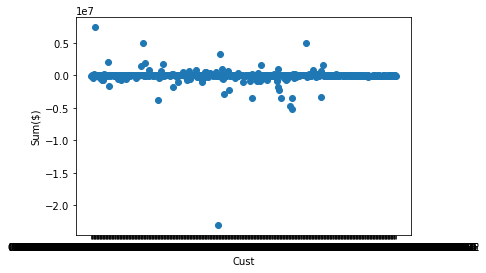

In [231]:
import matplotlib.pyplot as plt
plt.scatter(df_customer_transactions.index,df_customer_transactions['sum_txn'])
plt.xlabel("Cust")
df['cluster'] = pred
plt.ylabel("Sum($)")

In [232]:
df_customer_transactions['cluster'] = pred
df1 = df_customer_transactions[df_customer_transactions['cluster'] == 0]
df2 = df_customer_transactions[df_customer_transactions['cluster'] == 1]
df3 = df_customer_transactions[df_customer_transactions['cluster'] == 2]

In [235]:
df3

,max_tran,min_Txn,count_txns,mean_txn,sum_txn,cluster
party_id,,,,,,
83380EDEA3D95BAD30834C9868,72001688.0,-71429922.6,543,-42434.757422,-23042073.28,2
C66D185413A9DC2923A8B16288,131208334.1,-127563728.2,946,12.196744,11538.12,2


In [236]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [237]:
max_tran_scaled = scaler.fit_transform(df_customer_transactions[['max_tran']])
df_customer_transactions['max_tran_scaled'] = max_tran_scaled

min_tran_scaled = scaler.fit_transform(df_customer_transactions[['min_Txn']])
df_customer_transactions['min_tran_scaled'] = min_tran_scaled

count_tran_scaled = scaler.fit_transform(df_customer_transactions[['count_txns']])
df_customer_transactions['count_tran_scaled'] = count_tran_scaled


sum_tran_scaled = scaler.fit_transform(df_customer_transactions[['sum_txn']])
df_customer_transactions['sum_tran_scaled'] = sum_tran_scaled

In [238]:
import pandas as pd
from sklearn.cluster import KMeans

X = df_customer_transactions[['max_tran_scaled','min_tran_scaled','count_tran_scaled','sum_tran_scaled']]
model = KMeans(n_clusters=3)

In [239]:
X

,max_tran_scaled,min_tran_scaled,count_tran_scaled,sum_tran_scaled
party_id,,,,
009154EFA27FD311AC8BDFBE50,9.761433e-05,0.999782,0.671972,0.753235
013FC6106EE0CF698A7375BEFF,1.270291e-04,0.999907,0.510035,0.756628
0253E17F7C8FFC72C1D3CD7CBE,1.083630e-05,0.999968,0.435294,0.755355
051789B8B1D221B6173146E0FC,8.919118e-04,0.998452,0.265744,0.743783
061307F9C51C1A0455B09464E9,7.199758e-05,0.999740,0.635294,0.761576
...,...,...,...,...
EF97D841FFA04F12618A5C5ACD,2.145630e-08,0.999999,0.309343,0.755832
F17044D4917A4D877737643D55,5.204566e-05,0.999997,0.323875,0.756622
F19C4A0EF21E730CFB820AE4E0,1.081683e-04,0.999952,0.248443,0.753642


In [240]:
model.fit(X)
pred = model.predict(X) 

In [241]:
pred

array([2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0,
       2, 1, 0, 2, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1,
       0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0,
       2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 1, 0, 1, 2, 2,
       1, 0, 1, 2, 2, 1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 0, 2, 1, 2,
       2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 0,
       2, 2, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 2, 1,

In [248]:
df_customer_transactions['cluster'] = pred
df1 = df_customer_transactions[df_customer_transactions['cluster'] == 0]
df2 = df_customer_transactions[df_customer_transactions['cluster'] == 1]
df3 = df_customer_transactions[df_customer_transactions['cluster'] == 2]

In [249]:
df3

,max_tran,min_Txn,count_txns,mean_txn,sum_txn,cluster,max_tran_scaled,min_tran_scaled,count_tran_scaled,sum_tran_scaled
party_id,,,,,,,,,,
009154EFA27FD311AC8BDFBE50,45120.52,-60000.00,973,-87.507081,-85144.39,2,9.761433e-05,0.999782,0.671972,0.753235
061307F9C51C1A0455B09464E9,33277.00,-71577.66,920,183.771587,169069.86,2,7.199758e-05,0.999740,0.635294,0.761576
06488BD7809A10774DC2C8B0B4,3595.45,-24647.81,884,-24.472172,-21633.40,2,7.798350e-06,0.999910,0.610381,0.755319
075C9B839B9270C493ECE9894D,4450.00,-4444.00,952,-0.325242,-309.63,2,9.646685e-06,0.999984,0.657439,0.756018
07C6767D38CA08706A8AA9DBD4,10000000.00,-10000000.00,1094,6796.808830,7435708.86,2,2.162936e-02,0.963658,0.755709,1.000000
...,...,...,...,...,...,...,...,...,...,...
880C79D878BC729D707CBC2368,1000.00,-149.99,963,-11.028089,-10620.05,2,2.184563e-06,0.999999,0.665052,0.755680
8B05F227420F22019F782677A6,159.23,-193.63,846,61.851868,52326.68,2,3.660333e-07,0.999999,0.584083,0.757745
8F7EDFD6BFF6BD617E76B2E7A4,3.66,-3536.82,797,-30.193777,-24064.44,2,2.954568e-08,0.999987,0.550173,0.755239


In [247]:
df_customer_transactions

,max_tran,min_Txn,count_txns,mean_txn,sum_txn,cluster,max_tran_scaled,min_tran_scaled,count_tran_scaled,sum_tran_scaled
party_id,,,,,,,,,,
009154EFA27FD311AC8BDFBE50,45120.52,-60000.00,973,-87.507081,-85144.39,2,9.761433e-05,0.999782,0.671972,0.753235
013FC6106EE0CF698A7375BEFF,58720.00,-25500.00,739,24.706576,18258.16,1,1.270291e-04,0.999907,0.510035,0.756628
0253E17F7C8FFC72C1D3CD7CBE,5000.00,-8877.90,631,-32.541537,-20533.71,1,1.083630e-05,0.999968,0.435294,0.755355
051789B8B1D221B6173146E0FC,412352.05,-425959.53,386,-966.914896,-373229.15,0,8.919118e-04,0.998452,0.265744,0.743783
061307F9C51C1A0455B09464E9,33277.00,-71577.66,920,183.771587,169069.86,2,7.199758e-05,0.999740,0.635294,0.761576
...,...,...,...,...,...,...,...,...,...,...
EF97D841FFA04F12618A5C5ACD,-0.08,-140.62,449,-13.326214,-5983.47,1,2.145630e-08,0.999999,0.309343,0.755832
F17044D4917A4D877737643D55,24052.53,-695.86,470,38.456723,18074.66,1,5.204566e-05,0.999997,0.323875,0.756622
F19C4A0EF21E730CFB820AE4E0,50000.00,-13084.60,361,-201.467590,-72729.80,0,1.081683e-04,0.999952,0.248443,0.753642


In [251]:
df_customer_transactions

,max_tran,min_Txn,count_txns,mean_txn,sum_txn,cluster,max_tran_scaled,min_tran_scaled,count_tran_scaled,sum_tran_scaled
party_id,,,,,,,,,,
009154EFA27FD311AC8BDFBE50,45120.52,-60000.00,973,-87.507081,-85144.39,2,9.761433e-05,0.999782,0.671972,0.753235
013FC6106EE0CF698A7375BEFF,58720.00,-25500.00,739,24.706576,18258.16,1,1.270291e-04,0.999907,0.510035,0.756628
0253E17F7C8FFC72C1D3CD7CBE,5000.00,-8877.90,631,-32.541537,-20533.71,1,1.083630e-05,0.999968,0.435294,0.755355
051789B8B1D221B6173146E0FC,412352.05,-425959.53,386,-966.914896,-373229.15,0,8.919118e-04,0.998452,0.265744,0.743783
061307F9C51C1A0455B09464E9,33277.00,-71577.66,920,183.771587,169069.86,2,7.199758e-05,0.999740,0.635294,0.761576
...,...,...,...,...,...,...,...,...,...,...
EF97D841FFA04F12618A5C5ACD,-0.08,-140.62,449,-13.326214,-5983.47,1,2.145630e-08,0.999999,0.309343,0.755832
F17044D4917A4D877737643D55,24052.53,-695.86,470,38.456723,18074.66,1,5.204566e-05,0.999997,0.323875,0.756622
F19C4A0EF21E730CFB820AE4E0,50000.00,-13084.60,361,-201.467590,-72729.80,0,1.081683e-04,0.999952,0.248443,0.753642


In [ ]:
df = df_customer_transactions
df1_1 = df[df['cluster'] == 0]
df2_1 = df[df['cluster'] == 1]
df3_1 = df[df['cluster'] == 2]

plt.scatter(df1_1['sum_txn'],df1_1['income_scaled'],c='green')
plt.scatter(df2_1['mean_txn'],df2_1['income_scaled'],c='red')
plt.scatter(df3_1['mean_txn'],df3_1['income_scaled'],c='black')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='*',c='blue')
plt.xlabel("Mean")
plt.ylabel("")

In [252]:
df_customer_transactions.head()

,max_tran,min_Txn,count_txns,mean_txn,sum_txn,cluster,max_tran_scaled,min_tran_scaled,count_tran_scaled,sum_tran_scaled
party_id,,,,,,,,,,
009154EFA27FD311AC8BDFBE50,45120.52,-60000.00,973,-87.507081,-85144.39,2,0.000098,0.999782,0.671972,0.753235
013FC6106EE0CF698A7375BEFF,58720.00,-25500.00,739,24.706576,18258.16,1,0.000127,0.999907,0.510035,0.756628
0253E17F7C8FFC72C1D3CD7CBE,5000.00,-8877.90,631,-32.541537,-20533.71,1,0.000011,0.999968,0.435294,0.755355
051789B8B1D221B6173146E0FC,412352.05,-425959.53,386,-966.914896,-373229.15,0,0.000892,0.998452,0.265744,0.743783
061307F9C51C1A0455B09464E9,33277.00,-71577.66,920,183.771587,169069.86,2,0.000072,0.999740,0.635294,0.761576


In [253]:
df_CARDS_Tran

,max_tran,min_Txn,count_txns,mean_txn,sum_txn
party_id,,,,,
0018536E0B152D2FF5F9965179,117.26,-575.20,301,-36.313654,-10930.41
01540636CB5736525304F4C3A1,12768.67,-1500.00,325,9.387969,3051.09
03140E56A5216DC4B6444EDCA8,37267.36,-5161.68,528,44.162822,23317.97
098398A30E55A73F658B0BEBDF,11100.00,-4800.93,250,-101.608640,-25402.16
0C8150E24455F27F44E1D38149,-1.00,-115.75,643,-6.666827,-4286.77
...,...,...,...,...,...
EF97D841FFA04F12618A5C5ACD,-0.08,-140.62,449,-13.326214,-5983.47
F17044D4917A4D877737643D55,24052.53,-695.86,470,38.456723,18074.66
F19C4A0EF21E730CFB820AE4E0,50000.00,-13084.60,361,-201.467590,-72729.80


In [258]:
df_Cards[(df_Cards['party_id']=="356CD573F7A0F24163BFD60555") & (df_Cards['tran_direction']=='C')]

,acct_id,tran_amount,tran_code,tran_direction,as_of_date_x,acct_hold_type_x,acct_status_x,party_id_x,tran_sign,as_of_date_y,acct_hold_type_y,acct_status_y,party_id_y,tran_val,as_of_date,acct_hold_type,acct_status,party_id
344,189A2AD356CD573F7A0F24163BFD605550988DD5,463889.71,344,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,1,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,463889.71,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555
420,189A2AD356CD573F7A0F24163BFD605550988DD5,419739.98,344,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,1,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,419739.98,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555


In [263]:
df_c_c = df_Cards[df_Cards['tran_direction']=='C'].groupby(['party_id'])['tran_amount'].sum()

In [275]:
df_c_c

,tran_amount
party_id,
0018536E0B152D2FF5F9965179,968.32
01540636CB5736525304F4C3A1,12768.67
03140E56A5216DC4B6444EDCA8,70795.91
098398A30E55A73F658B0BEBDF,232653.28
11E8A1E1045FC82A4A60783B0D,1130.13
...,...
EBCBE4211369E18A644EB00D89,3851.85
ED32A6332F66118C6EEA19BEF6,44523.00
F17044D4917A4D877737643D55,37109.05


In [267]:
df_c_c = df_c_c.to_frame()

In [274]:
df.reset_index().r()

Index(['009154EFA27FD311AC8BDFBE50', '013FC6106EE0CF698A7375BEFF',
       '0253E17F7C8FFC72C1D3CD7CBE', '051789B8B1D221B6173146E0FC',
       '061307F9C51C1A0455B09464E9', '06488BD7809A10774DC2C8B0B4',
       '075C9B839B9270C493ECE9894D', '07C6767D38CA08706A8AA9DBD4',
       '0835F6793567683B219249A7E8', '08A5C367A3C8BAA7AB8DA48322',
       ...
       'E782D8D517F4CD37AB8B240E50', 'E980C4808ED1EB8800055F6772',
       'EBCBE4211369E18A644EB00D89', 'EC67E7218F72F474A1462021A4',
       'ED32A6332F66118C6EEA19BEF6', 'EF97D841FFA04F12618A5C5ACD',
       'F17044D4917A4D877737643D55', 'F19C4A0EF21E730CFB820AE4E0',
       'F869BB7D70355B4DE0CFA6E232', 'F9D4F54FC533E263075768D13E'],
      dtype='object', name='party_id', length=505)

In [278]:
df_customer_transactions.reset_index()

,party_id,max_tran,min_Txn,count_txns,mean_txn,sum_txn,cluster,max_tran_scaled,min_tran_scaled,count_tran_scaled,sum_tran_scaled
0,009154EFA27FD311AC8BDFBE50,45120.52,-60000.00,973,-87.507081,-85144.39,2,9.761433e-05,0.999782,0.671972,0.753235
1,013FC6106EE0CF698A7375BEFF,58720.00,-25500.00,739,24.706576,18258.16,1,1.270291e-04,0.999907,0.510035,0.756628
2,0253E17F7C8FFC72C1D3CD7CBE,5000.00,-8877.90,631,-32.541537,-20533.71,1,1.083630e-05,0.999968,0.435294,0.755355
3,051789B8B1D221B6173146E0FC,412352.05,-425959.53,386,-966.914896,-373229.15,0,8.919118e-04,0.998452,0.265744,0.743783
4,061307F9C51C1A0455B09464E9,33277.00,-71577.66,920,183.771587,169069.86,2,7.199758e-05,0.999740,0.635294,0.761576
...,...,...,...,...,...,...,...,...,...,...,...
500,EF97D841FFA04F12618A5C5ACD,-0.08,-140.62,449,-13.326214,-5983.47,1,2.145630e-08,0.999999,0.309343,0.755832
501,F17044D4917A4D877737643D55,24052.53,-695.86,470,38.456723,18074.66,1,5.204566e-05,0.999997,0.323875,0.756622
502,F19C4A0EF21E730CFB820AE4E0,50000.00,-13084.60,361,-201.467590,-72729.80,0,1.081683e-04,0.999952,0.248443,0.753642
503,F869BB7D70355B4DE0CFA6E232,1500.00,-950.15,290,55.256828,16024.48,0,3.266030e-06,0.999997,0.199308,0.756554


In [279]:
df_c_c.reset_index()

,party_id,tran_amount
0,0018536E0B152D2FF5F9965179,968.32
1,01540636CB5736525304F4C3A1,12768.67
2,03140E56A5216DC4B6444EDCA8,70795.91
3,098398A30E55A73F658B0BEBDF,232653.28
4,11E8A1E1045FC82A4A60783B0D,1130.13
...,...,...
96,EBCBE4211369E18A644EB00D89,3851.85
97,ED32A6332F66118C6EEA19BEF6,44523.00
98,F17044D4917A4D877737643D55,37109.05
99,F19C4A0EF21E730CFB820AE4E0,106593.79


In [281]:
df_customer_transactions = df_customer_transactions.merge(df_c_c, on='party_id', how='left')

In [287]:
df_Casa

0             28.00
1           1192.68
2          40000.00
3           1810.00
4         202845.53
            ...    
274993       100.00
274994       100.00
274995        50.00
274996        30.00
274997        30.00
Name: tran_amount, Length: 274998, dtype: float64

In [283]:
df_Casa

,acct_id,tran_amount,tran_code,tran_direction,as_of_date,acct_hold_type,acct_status,party_id,tran_sign,tran_val
0,F8FCAB9A80B6E691DBA3D4CC77C0674DCA4E1DFF,28.0,OTT CHG,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,A80B6E691DBA3D4CC77C0674DC,-1,-28.00
1,F8FCAB9A80B6E691DBA3D4CC77C0674DCA4E1DFF,1192.68,RTF,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,A80B6E691DBA3D4CC77C0674DC,1,1192.68
2,F8FCAB9A80B6E691DBA3D4CC77C0674DCA4E1DFF,40000.0,RTF,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,A80B6E691DBA3D4CC77C0674DC,-1,-40000.00
3,F8FCAB9A80B6E691DBA3D4CC77C0674DCA4E1DFF,1810.0,ICT,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,A80B6E691DBA3D4CC77C0674DC,-1,-1810.00
4,F8FCAB9A80B6E691DBA3D4CC77C0674DCA4E1DFF,202845.53,RTF,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,A80B6E691DBA3D4CC77C0674DC,-1,-202845.53
...,...,...,...,...,...,...,...,...,...,...
274993,1D0360D9BA16AD724C765BCA889C1DAC5776B5E1,100.0,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,9BA16AD724C765BCA889C1DAC5,1,100.00
274994,1D0360D9BA16AD724C765BCA889C1DAC5776B5E1,100.0,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,9BA16AD724C765BCA889C1DAC5,1,100.00
274995,1D0360D9BA16AD724C765BCA889C1DAC5776B5E1,50.0,ITR,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,9BA16AD724C765BCA889C1DAC5,-1,-50.00
274996,1D0360D9BA16AD724C765BCA889C1DAC5776B5E1,30.0,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,9BA16AD724C765BCA889C1DAC5,1,30.00


In [290]:

df_Casa=df_casa_data[['acct_id','tran_amount','tran_code','tran_direction']]
df_Casa = df_Casa.merge(df_cust_map,on='acct_id')

In [291]:
df_Casa.tran_amount = df_Casa.tran_amount.astype(float)

In [292]:
df_casa_c = df_Casa[df_Casa['tran_direction']=='C'].groupby(['party_id'])['tran_amount'].sum()

In [293]:
df_casa_c

party_id
009154EFA27FD311AC8BDFBE50      182980.71
013FC6106EE0CF698A7375BEFF      220843.48
0253E17F7C8FFC72C1D3CD7CBE      318206.77
051789B8B1D221B6173146E0FC      830693.00
061307F9C51C1A0455B09464E9      527001.23
                                 ...     
F9F9C81E055FE38FC3C176C493     3502745.30
FA6EB5E8B255528AACCB41485A     3892840.84
FB0B1C200E11736DEAF956110B     1417817.07
FB81856FAA88465797926E3A56    19920327.40
FD8984DF1676FB14332AEB61C0     3239656.56
Name: tran_amount, Length: 385, dtype: float64

In [294]:
df_customer_transactions.head()

,max_tran,min_Txn,count_txns,mean_txn,sum_txn,cluster,max_tran_scaled,min_tran_scaled,count_tran_scaled,sum_tran_scaled,tran_amount
party_id,,,,,,,,,,,
009154EFA27FD311AC8BDFBE50,45120.52,-60000.00,973,-87.507081,-85144.39,2,0.000098,0.999782,0.671972,0.753235,NaN
013FC6106EE0CF698A7375BEFF,58720.00,-25500.00,739,24.706576,18258.16,1,0.000127,0.999907,0.510035,0.756628,NaN
0253E17F7C8FFC72C1D3CD7CBE,5000.00,-8877.90,631,-32.541537,-20533.71,1,0.000011,0.999968,0.435294,0.755355,NaN
051789B8B1D221B6173146E0FC,412352.05,-425959.53,386,-966.914896,-373229.15,0,0.000892,0.998452,0.265744,0.743783,NaN
061307F9C51C1A0455B09464E9,33277.00,-71577.66,920,183.771587,169069.86,2,0.000072,0.999740,0.635294,0.761576,NaN


In [295]:
df_c_c = df_Cards[df_Cards['tran_direction']=='C'].groupby(['party_id'])['tran_amount'].sum()

,tran_amount
party_id,
0018536E0B152D2FF5F9965179,968.32
01540636CB5736525304F4C3A1,12768.67
03140E56A5216DC4B6444EDCA8,70795.91
098398A30E55A73F658B0BEBDF,232653.28
11E8A1E1045FC82A4A60783B0D,1130.13
...,...
EBCBE4211369E18A644EB00D89,3851.85
ED32A6332F66118C6EEA19BEF6,44523.00
F17044D4917A4D877737643D55,37109.05


In [296]:
df_casa_c = df_casa_c.to_frame()

In [298]:
df_casa_c.reset_index()

,party_id,tran_amount
0,009154EFA27FD311AC8BDFBE50,182980.71
1,013FC6106EE0CF698A7375BEFF,220843.48
2,0253E17F7C8FFC72C1D3CD7CBE,318206.77
3,051789B8B1D221B6173146E0FC,830693.00
4,061307F9C51C1A0455B09464E9,527001.23
...,...,...
380,F9F9C81E055FE38FC3C176C493,3502745.30
381,FA6EB5E8B255528AACCB41485A,3892840.84
382,FB0B1C200E11736DEAF956110B,1417817.07
383,FB81856FAA88465797926E3A56,19920327.40


In [299]:

df_casa_c.rename(columns={'tran_amount':'casa_tran_amount'},inplace=True)

In [302]:
df_casa_c = df_casa_c.reset_index(())

In [305]:
df_casa_c.reset_index(inplace=True)

In [306]:
df_casa_c

,party_id,casa_tran_amount
0,009154EFA27FD311AC8BDFBE50,182980.71
1,013FC6106EE0CF698A7375BEFF,220843.48
2,0253E17F7C8FFC72C1D3CD7CBE,318206.77
3,051789B8B1D221B6173146E0FC,830693.00
4,061307F9C51C1A0455B09464E9,527001.23
...,...,...
380,F9F9C81E055FE38FC3C176C493,3502745.30
381,FA6EB5E8B255528AACCB41485A,3892840.84
382,FB0B1C200E11736DEAF956110B,1417817.07
383,FB81856FAA88465797926E3A56,19920327.40


In [307]:
df_customer_transactions = df_customer_transactions.merge(df_casa_c, on='party_id', how='left')

In [333]:
df_customer_transactions

,party_id,max_tran,min_Txn,count_txns,mean_txn,sum_txn,cluster,max_tran_scaled,min_tran_scaled,count_tran_scaled,sum_tran_scaled,tran_amount,casa_tran_amount,income,Expenditures
0,009154EFA27FD311AC8BDFBE50,45120.52,-60000.00,973,-87.507081,-85144.39,2,9.761433e-05,0.999782,0.671972,0.753235,0.00,182980.71,182980.71,-268125.10
1,013FC6106EE0CF698A7375BEFF,58720.00,-25500.00,739,24.706576,18258.16,1,1.270291e-04,0.999907,0.510035,0.756628,0.00,220843.48,220843.48,-202585.32
2,0253E17F7C8FFC72C1D3CD7CBE,5000.00,-8877.90,631,-32.541537,-20533.71,1,1.083630e-05,0.999968,0.435294,0.755355,0.00,318206.77,318206.77,-338740.48
3,051789B8B1D221B6173146E0FC,412352.05,-425959.53,386,-966.914896,-373229.15,0,8.919118e-04,0.998452,0.265744,0.743783,0.00,830693.00,830693.00,-1203922.15
4,061307F9C51C1A0455B09464E9,33277.00,-71577.66,920,183.771587,169069.86,2,7.199758e-05,0.999740,0.635294,0.761576,0.00,527001.23,527001.23,-357931.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,EF97D841FFA04F12618A5C5ACD,-0.08,-140.62,449,-13.326214,-5983.47,1,2.145630e-08,0.999999,0.309343,0.755832,0.00,0.00,0.00,-5983.47
501,F17044D4917A4D877737643D55,24052.53,-695.86,470,38.456723,18074.66,1,5.204566e-05,0.999997,0.323875,0.756622,37109.05,0.00,37109.05,18074.66
502,F19C4A0EF21E730CFB820AE4E0,50000.00,-13084.60,361,-201.467590,-72729.80,0,1.081683e-04,0.999952,0.248443,0.753642,106593.79,0.00,106593.79,-72729.80
503,F869BB7D70355B4DE0CFA6E232,1500.00,-950.15,290,55.256828,16024.48,0,3.266030e-06,0.999997,0.199308,0.756554,42854.10,0.00,42854.10,16024.48


In [331]:
df_customer_transactions['income'] = df_customer_transactions['tran_amount']+df_customer_transactions['casa_tran_amount']

In [332]:
df_customer_transactions['Expenditures'] = df_customer_transactions['sum_txn'] - df_customer_transactions['casa_tran_amount']

In [330]:

df_customer_transactions['tran_amount'] = df_customer_transactions['tran_amount'].fillna(0)

df_customer_transactions['casa_tran_amount'] = df_customer_transactions['casa_tran_amount'].fillna(0)

In [316]:
df_Casa[df_Casa['party_id'] == '009154EFA27FD311AC8BDFBE50']

,acct_id,tran_amount,tran_code,tran_direction,as_of_date,acct_hold_type,acct_status,party_id
47210,E865E8E009154EFA27FD311AC8BDFBE50179BF5F,520.00,305029,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,009154EFA27FD311AC8BDFBE50
47211,E865E8E009154EFA27FD311AC8BDFBE50179BF5F,150.00,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,009154EFA27FD311AC8BDFBE50
47212,E865E8E009154EFA27FD311AC8BDFBE50179BF5F,30.00,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,009154EFA27FD311AC8BDFBE50
47213,E865E8E009154EFA27FD311AC8BDFBE50179BF5F,50.00,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,009154EFA27FD311AC8BDFBE50
47214,E865E8E009154EFA27FD311AC8BDFBE50179BF5F,160.00,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,009154EFA27FD311AC8BDFBE50
...,...,...,...,...,...,...,...,...
48178,E865E8E009154EFA27FD311AC8BDFBE50179BF5F,100.00,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,009154EFA27FD311AC8BDFBE50
48179,E865E8E009154EFA27FD311AC8BDFBE50179BF5F,60.00,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,009154EFA27FD311AC8BDFBE50
48180,E865E8E009154EFA27FD311AC8BDFBE50179BF5F,100.00,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,009154EFA27FD311AC8BDFBE50
48181,E865E8E009154EFA27FD311AC8BDFBE50179BF5F,10.00,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,009154EFA27FD311AC8BDFBE50


In [318]:
df_Cards[df_Cards['party_id'] == '009154EFA27FD311AC8BDFBE50']

,acct_id,tran_amount,tran_code,tran_direction,as_of_date_x,acct_hold_type_x,acct_status_x,party_id_x,tran_sign,as_of_date_y,acct_hold_type_y,acct_status_y,party_id_y,tran_val,as_of_date,acct_hold_type,acct_status,party_id


In [334]:
df_customer_transactions

,party_id,max_tran,min_Txn,count_txns,mean_txn,sum_txn,cluster,max_tran_scaled,min_tran_scaled,count_tran_scaled,sum_tran_scaled,tran_amount,casa_tran_amount,income,Expenditures
0,009154EFA27FD311AC8BDFBE50,45120.52,-60000.00,973,-87.507081,-85144.39,2,9.761433e-05,0.999782,0.671972,0.753235,0.00,182980.71,182980.71,-268125.10
1,013FC6106EE0CF698A7375BEFF,58720.00,-25500.00,739,24.706576,18258.16,1,1.270291e-04,0.999907,0.510035,0.756628,0.00,220843.48,220843.48,-202585.32
2,0253E17F7C8FFC72C1D3CD7CBE,5000.00,-8877.90,631,-32.541537,-20533.71,1,1.083630e-05,0.999968,0.435294,0.755355,0.00,318206.77,318206.77,-338740.48
3,051789B8B1D221B6173146E0FC,412352.05,-425959.53,386,-966.914896,-373229.15,0,8.919118e-04,0.998452,0.265744,0.743783,0.00,830693.00,830693.00,-1203922.15
4,061307F9C51C1A0455B09464E9,33277.00,-71577.66,920,183.771587,169069.86,2,7.199758e-05,0.999740,0.635294,0.761576,0.00,527001.23,527001.23,-357931.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,EF97D841FFA04F12618A5C5ACD,-0.08,-140.62,449,-13.326214,-5983.47,1,2.145630e-08,0.999999,0.309343,0.755832,0.00,0.00,0.00,-5983.47
501,F17044D4917A4D877737643D55,24052.53,-695.86,470,38.456723,18074.66,1,5.204566e-05,0.999997,0.323875,0.756622,37109.05,0.00,37109.05,18074.66
502,F19C4A0EF21E730CFB820AE4E0,50000.00,-13084.60,361,-201.467590,-72729.80,0,1.081683e-04,0.999952,0.248443,0.753642,106593.79,0.00,106593.79,-72729.80
503,F869BB7D70355B4DE0CFA6E232,1500.00,-950.15,290,55.256828,16024.48,0,3.266030e-06,0.999997,0.199308,0.756554,42854.10,0.00,42854.10,16024.48


In [ ]:
df_Casa
df_casa_data051789B8B1D221B6173146E0FC

In [335]:
df_Casa[df_Casa['party_id'] == '051789B8B1D221B6173146E0FC']

,acct_id,tran_amount,tran_code,tran_direction,as_of_date,acct_hold_type,acct_status,party_id
229067,1A513D0051789B8B1D221B6173146E0FC20A0CA0,31.0,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,051789B8B1D221B6173146E0FC
229068,1A513D0051789B8B1D221B6173146E0FC20A0CA0,85.0,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,051789B8B1D221B6173146E0FC
229069,1A513D0051789B8B1D221B6173146E0FC20A0CA0,61.0,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,051789B8B1D221B6173146E0FC
229070,1A513D0051789B8B1D221B6173146E0FC20A0CA0,61.0,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,051789B8B1D221B6173146E0FC
229071,1A513D0051789B8B1D221B6173146E0FC20A0CA0,41.0,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,051789B8B1D221B6173146E0FC
...,...,...,...,...,...,...,...,...
229448,1A513D0051789B8B1D221B6173146E0FC20A0CA0,215.0,ITR,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,051789B8B1D221B6173146E0FC
229449,1A513D0051789B8B1D221B6173146E0FC20A0CA0,21.8,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,051789B8B1D221B6173146E0FC
229450,1A513D0051789B8B1D221B6173146E0FC20A0CA0,265.0,ITR,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,051789B8B1D221B6173146E0FC
229451,1A513D0051789B8B1D221B6173146E0FC20A0CA0,65.0,ICT,C,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,051789B8B1D221B6173146E0FC


In [337]:
df_customer_transactions[['party_id','income','Expenditures','sum_txn','mean_txn','cluster']]

,party_id,income,Expenditures,sum_txn,mean_txn,cluster
0,009154EFA27FD311AC8BDFBE50,182980.71,-268125.10,-85144.39,-87.507081,2
1,013FC6106EE0CF698A7375BEFF,220843.48,-202585.32,18258.16,24.706576,1
2,0253E17F7C8FFC72C1D3CD7CBE,318206.77,-338740.48,-20533.71,-32.541537,1
3,051789B8B1D221B6173146E0FC,830693.00,-1203922.15,-373229.15,-966.914896,0
4,061307F9C51C1A0455B09464E9,527001.23,-357931.37,169069.86,183.771587,2
...,...,...,...,...,...,...
500,EF97D841FFA04F12618A5C5ACD,0.00,-5983.47,-5983.47,-13.326214,1
501,F17044D4917A4D877737643D55,37109.05,18074.66,18074.66,38.456723,1
502,F19C4A0EF21E730CFB820AE4E0,106593.79,-72729.80,-72729.80,-201.467590,0
503,F869BB7D70355B4DE0CFA6E232,42854.10,16024.48,16024.48,55.256828,0


In [347]:
def preproc(x):
    if(x == 0):
        return "High"
    elif (x == 0):
        return "Mid"
    else:
        return "Low"
df_customer_transactions['Cluster'] = df_customer_transactions.cluster.apply(lambda x : preproc(x))

In [351]:
df_spend_summary = df_customer_transactions[['party_id','income','Expenditures','sum_txn','mean_txn','Cluster']]

In [354]:
df_spend_summary.to_csv('Submission.csv')

Text(0, 0.5, 'Exp($)')

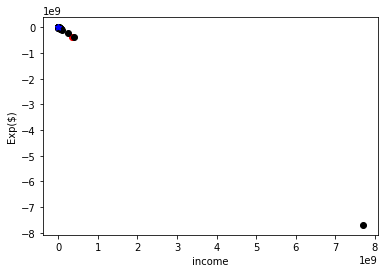

In [355]:
df = df_customer_transactions
df1_1 = df[df['cluster'] == 0]
df2_1 = df[df['cluster'] == 1]
df3_1 = df[df['cluster'] == 2]

plt.scatter(df1_1['income'],df1_1['Expenditures'],c='green')
plt.scatter(df2_1['income'],df2_1['Expenditures'],c='red')
plt.scatter(df3_1['income'],df3_1['Expenditures'],c='black')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='*',c='blue')
plt.xlabel("income")
plt.ylabel("Exp($)")

In [357]:
df_customer_transactions.columns

Index(['party_id', 'max_tran', 'min_Txn', 'count_txns', 'mean_txn', 'sum_txn',
       'cluster', 'max_tran_scaled', 'min_tran_scaled', 'count_tran_scaled',
       'sum_tran_scaled', 'tran_amount', 'casa_tran_amount', 'income',
       'Expenditures', 'Cluster'],
      dtype='object')

In [360]:
X = df_customer_transactions[['max_tran_scaled', 'min_tran_scaled', 'count_tran_scaled',
       'sum_tran_scaled', 'tran_amount', 'casa_tran_amount', 'income',
       'Expenditures']]

import pandas as pd
from sklearn.cluster import KMeans

#X = df_customer_transactions
model2 = KMeans(n_clusters=3)

In [361]:
model2.fit(X)

KMeans(n_clusters=3)

In [363]:
pred = model2.predict(X) 

In [364]:
df_customer_transactions['cluster_new'] = pred
df1 = df_customer_transactions[df_customer_transactions['cluster_new'] == 0]
df2 = df_customer_transactions[df_customer_transactions['cluster_new'] == 1]
df3 = df_customer_transactions[df_customer_transactions['cluster_new'] == 2]

((501, 17), (1, 17), (3, 17))

In [368]:
df_customer_transactions[df_customer_transactions['cluster'] == 0]

,party_id,max_tran,min_Txn,count_txns,mean_txn,sum_txn,cluster,max_tran_scaled,min_tran_scaled,count_tran_scaled,sum_tran_scaled,tran_amount,casa_tran_amount,income,Expenditures,Cluster,cluster_new
3,051789B8B1D221B6173146E0FC,412352.05,-425959.53,386,-966.914896,-373229.15,0,8.919118e-04,0.998452,0.265744,0.743783,0.00,830693.00,830693.00,-1203922.15,High,0
20,1111B94DBDBF13DB851183933A,635077.82,-638705.96,347,-1840.265360,-638572.08,0,1.373653e-03,0.997679,0.238754,0.735076,0.00,1268341.33,1268341.33,-1906913.41,High,0
21,1179F71296E09DF2A872BE1942,26873.96,-61328.98,173,-66.607283,-11523.06,0,5.814822e-05,0.999777,0.118339,0.755650,0.00,246706.10,246706.10,-258229.16,High,0
24,12D1C311E6E19477445B453A8C,175.00,-710.00,218,0.780688,170.19,0,4.001427e-07,0.999997,0.149481,0.756034,0.00,6733.19,6733.19,-6563.00,High,0
28,142ECAEBEB14AB5F0AA840E607,299638.85,-465120.92,242,8673.179959,2098909.55,0,6.481206e-04,0.998310,0.166090,0.824895,0.00,3583316.66,3583316.66,-1484407.11,High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,EBCBE4211369E18A644EB00D89,2000.00,-150.58,263,3.799696,999.32,0,4.347497e-06,0.999999,0.180623,0.756061,3851.85,0.00,3851.85,999.32,High,0
498,EC67E7218F72F474A1462021A4,-1.48,-225.00,373,-26.920027,-10041.17,0,1.842820e-08,0.999999,0.256747,0.755699,0.00,0.00,0.00,-10041.17,High,0
502,F19C4A0EF21E730CFB820AE4E0,50000.00,-13084.60,361,-201.467590,-72729.80,0,1.081683e-04,0.999952,0.248443,0.753642,106593.79,0.00,106593.79,-72729.80,High,0
503,F869BB7D70355B4DE0CFA6E232,1500.00,-950.15,290,55.256828,16024.48,0,3.266030e-06,0.999997,0.199308,0.756554,42854.10,0.00,42854.10,16024.48,High,0


In [369]:
df_customer_transactions[df_customer_transactions['cluster'] == 1]

,party_id,max_tran,min_Txn,count_txns,mean_txn,sum_txn,cluster,max_tran_scaled,min_tran_scaled,count_tran_scaled,sum_tran_scaled,tran_amount,casa_tran_amount,income,Expenditures,Cluster,cluster_new
1,013FC6106EE0CF698A7375BEFF,58720.00,-25500.00,739,24.706576,18258.16,1,1.270291e-04,0.999907,0.510035,0.756628,0.00,220843.48,220843.48,-202585.32,Low,0
2,0253E17F7C8FFC72C1D3CD7CBE,5000.00,-8877.90,631,-32.541537,-20533.71,1,1.083630e-05,0.999968,0.435294,0.755355,0.00,318206.77,318206.77,-338740.48,Low,0
10,0A45D2422B666D01A50DBF7169,18797.00,-7000.00,580,1.549034,898.44,1,4.067830e-05,0.999975,0.400000,0.756058,0.00,157347.13,157347.13,-156448.69,Low,0
12,0B70A8B1FE02EBF3F15324E2ED,30000.00,-8000.00,553,29.233942,16166.37,1,6.490964e-05,0.999971,0.381315,0.756559,0.00,64651.58,64651.58,-48485.21,Low,0
13,0B71FAC587F1124C18E72FA4F6,388101.34,-392978.64,522,12.057893,6294.22,1,8.394591e-04,0.998572,0.359862,0.756235,0.00,788575.15,788575.15,-782280.93,Low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,DB47B103006C265448B5BE229E,0.80,-452.99,661,-20.732511,-13704.19,1,2.335968e-08,0.999998,0.456055,0.755579,0.80,0.00,0.80,-13704.19,Low,0
493,E0DBB25DA684874E5BA321C007,111.56,-2793.00,774,-56.806550,-43968.27,1,2.629262e-07,0.999990,0.534256,0.754586,1037.75,0.00,1037.75,-43968.27,Low,0
499,ED32A6332F66118C6EEA19BEF6,29500.00,-8374.57,467,14.891563,6954.36,1,6.382818e-05,0.999970,0.321799,0.756257,44523.00,0.00,44523.00,6954.36,Low,0
500,EF97D841FFA04F12618A5C5ACD,-0.08,-140.62,449,-13.326214,-5983.47,1,2.145630e-08,0.999999,0.309343,0.755832,0.00,0.00,0.00,-5983.47,Low,0


In [370]:
df_customer_transactions[df_customer_transactions['cluster'] == 2]

,party_id,max_tran,min_Txn,count_txns,mean_txn,sum_txn,cluster,max_tran_scaled,min_tran_scaled,count_tran_scaled,sum_tran_scaled,tran_amount,casa_tran_amount,income,Expenditures,Cluster,cluster_new
0,009154EFA27FD311AC8BDFBE50,45120.52,-60000.00,973,-87.507081,-85144.39,2,9.761433e-05,0.999782,0.671972,0.753235,0.00,182980.71,182980.71,-268125.10,Low,0
4,061307F9C51C1A0455B09464E9,33277.00,-71577.66,920,183.771587,169069.86,2,7.199758e-05,0.999740,0.635294,0.761576,0.00,527001.23,527001.23,-357931.37,Low,0
5,06488BD7809A10774DC2C8B0B4,3595.45,-24647.81,884,-24.472172,-21633.40,2,7.798350e-06,0.999910,0.610381,0.755319,0.00,289760.90,289760.90,-311394.30,Low,0
6,075C9B839B9270C493ECE9894D,4450.00,-4444.00,952,-0.325242,-309.63,2,9.646685e-06,0.999984,0.657439,0.756018,0.00,211166.57,211166.57,-211476.20,Low,0
7,07C6767D38CA08706A8AA9DBD4,10000000.00,-10000000.00,1094,6796.808830,7435708.86,2,2.162936e-02,0.963658,0.755709,1.000000,0.00,48032121.34,48032121.34,-40596412.48,Low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,880C79D878BC729D707CBC2368,1000.00,-149.99,963,-11.028089,-10620.05,2,2.184563e-06,0.999999,0.665052,0.755680,2518.88,0.00,2518.88,-10620.05,Low,0
452,8B05F227420F22019F782677A6,159.23,-193.63,846,61.851868,52326.68,2,3.660333e-07,0.999999,0.584083,0.757745,74657.70,0.00,74657.70,52326.68,Low,0
453,8F7EDFD6BFF6BD617E76B2E7A4,3.66,-3536.82,797,-30.193777,-24064.44,2,2.954568e-08,0.999987,0.550173,0.755239,11.89,0.00,11.89,-24064.44,Low,0
457,99172E536A0D08EB4AA8CB889F,4000.00,-170.31,1447,-5.433760,-7862.65,2,8.673364e-06,0.999999,1.000000,0.755771,7704.92,0.00,7704.92,-7862.65,Low,0


In [373]:
val_cnts = df_cards_data['acct_type'].value_counts()

<BarContainer object of 3 artists>

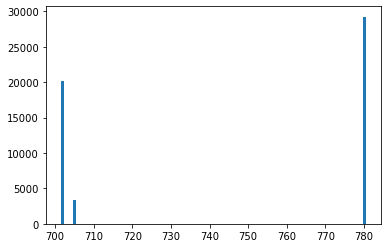

In [376]:
plt.bar(val_cnts.index,val_cnts.values)

In [390]:
df_cards_data

,as_of_date,ACCT_ID,acct_type,acct_sub_type,card_acct,card_nbr,tran_date,tran_curr_code,tran_amount,tran_code,tran_direction,merchant_id,merch_desc,mcc,orig_curr_amt,orig_curr_code,country_code,contactless_ind,online_ind,tran_ref,posting_date,row_key_value,BILL_CORP_SNAME,BILLER_REFERENCE,BILL_CORP_CODE,BILLER_NAME,ACCT_ID_CASA,transactionId,category,acct_id
0,14-06-2021,189A2AD356CD573F7A0F24163BFD605550988DD5,702,168,7253493DD4FF9F389600D3EAF33E6B9111A60BEE,3DAD5B1E1901B08EBAC0B99AB59FBC14C3BA68EC,17-05-2021,SGD,200.00,1,D,700012023,IPOS SINGAPORE SGP,9399,200.00,0,SGP,N,N,T211380128100080000023,18-05-2021,?,?,?,?,?,?,1_cMU911m22rTuwkCXHTNu_qi2foZqvNIWqD9Ljoei0=,Taxes & Authorities,189A2AD356CD573F7A0F24163BFD605550988DD5
1,14-06-2021,5A74E773F2ABBD57C479E63B367C8804424BAC52,702,924,B26071C8076D13B28974FE6DAFB4441F49650C4E,24B6C8DE6F60885E48E6377057F5702F2F35666D,10-06-2021,SGD,50.00,1,D,700011987,EZL AUTO TOPUP (CBT) SINGAPORE SGP,6540,50.00,0,SGP,N,N,T211610128019150000027,10-06-2021,?,?,?,?,?,?,1_HvqgzCIEEg_n1q65ap1QLtQ3JcgFITnBstDvaQQOs=,Other,5A74E773F2ABBD57C479E63B367C8804424BAC52
2,14-06-2021,578E6840C8150E24455F27F44E1D381495ADAC14,780,781,4EF8B5CBC460767EAFC1468D60D678D756F2EEDE,05993A1F025E481EA173C9E896D80FA5DFE25694,10-05-2021,SGD,2.98,1,D,20088765,GOOGLE*PLAYRIX GAMES SINGAPORE SGP,5818,0.00,0,SGP,N,Y,MT211310112000010035714,11-05-2021,?,?,?,?,?,?,1_oK-lPwOmtb1ef5osleRvo5y4bhGBG8_8U2tlfwcN0=,Entertainment,578E6840C8150E24455F27F44E1D381495ADAC14
3,14-06-2021,60689BC53AF8CF929509D0320EDDB3B5C675805A,780,781,3D7A6FB1B43B552776D4349D58CD656C73E06D86,4FD4ADE82EB165844AEB4AFF6AD2FEEE6BEE0C78,31-05-2021,SGD,1.58,2,D,5.27E+14,GOOGLE BIGO MOUNTAIN VIEW CA,5816,4.77,458,USA,N,Y,MT211520113000010434275,01-06-2021,?,?,?,?,?,?,1_OXkCBLeCwVZsewT6E3WfuiIFg7kcwRVB4uHp7ukxc=,Entertainment,60689BC53AF8CF929509D0320EDDB3B5C675805A
4,14-06-2021,B4A5916A6376095E53A6D30A143F724139CFD1F1,702,162,81344FF28BDC9773013816D1EE85E46E2D6F715E,2E1119A45A2AAAB22EF39F71641B893F04572026,07-06-2021,SGD,112.12,2,D,1.20E+11,CHI FOOT SPA DUBAI AE,7298,300.00,784,AE,Y,N,VT211590127030810000024,08-06-2021,?,?,?,?,?,?,1_QNuPE4B8kvgWv9evCY5JpbGqbggmXkKBNi6LTdkRw=,Personal Care,B4A5916A6376095E53A6D30A143F724139CFD1F1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52739,14-06-2021,EDEFDDE50E6760955E1BBE5EDAEC5875FB5FD13C,702,212,B3291600799F4248E8227F74941517BA8C1DBE13,779E3436203B0FFABC11E424558E1DF3161BFD39,23-05-2021,SGD,16.67,1,D,2.30E+14,TAOBAO.COM SINGAPORE SGP,5311,0.00,0,SGP,N,Y,MT211440122000010016130,24-05-2021,?,?,?,?,?,?,1zxi7mTf6GdgKZauSjb465T26KH34xMdF2AjF90pxyo=,Shopping,EDEFDDE50E6760955E1BBE5EDAEC5875FB5FD13C
52740,14-06-2021,1898BE79BDB116EB0BBCB73B8DFA5D72C73D399B,702,168,238EBED5E55AC896B487D527A6169852EB91FEC5,917815A9DD297C29B9EEF11E9ADD02066FC24A7C,13-05-2021,SGD,4.48,1,D,4.78E+14,GOOGLE SINGAPORE SINGAPORE SG,5817,0.00,0,SGP,N,Y,VT211340239002460000140,14-05-2021,?,?,?,?,?,?,1zxKfUk_HpsEIKX3VM5l61JkXUKfqrDYwW2T-tdqlyI=,Shopping,1898BE79BDB116EB0BBCB73B8DFA5D72C73D399B
52741,14-06-2021,A947D574E39AC90866CA34CAA6CEC997E988CFAC,702,162,A79687AF53F3979FBF12DCB68D239529B9452ADF,A7FBD2CB0DBA8733CBCC017F951371734FF32076,05-05-2021,SGD,9.30,1,D,205670,GRAB IOS-XVXAPVHGWILA SINGAPORE SG,4121,0.00,0,SGP,N,Y,VT211250127026030000044,05-05-2021,?,?,?,?,?,?,1zxWFdPGDj1XEQmgWCtmTnire48gWOgsc73ONHY1pYw=,Transportation,A947D574E39AC90866CA34CAA6CEC997E988CFAC
52742,14-06-2021,9B0056DCD7756CBD5344D1A33C9A92096FFEDACF,780,880,FECE32FF4633C3B0E1E8B1DF860200DDB8632C25,F48A85C5657BF8748F0C02E6BF37CB2CBAA22AED,04-05-2021,SGD,1000.00,1,D,511323,GOOGLE*ADSXXXXXXXXXX SINGAPORE SG,7311,0.00,0,SGP,N,Y,VT211260127013670000131,06-05-2021,?,?,?,?,?,?,1ZytU5P9g9ldDQCpp-nAQMhdncH8DJQ8QJpk0xLs-1Q=,Office expenses,9B0056DCD7756CBD5344D1A33C9A92096FFEDACF


# EDA 

In [388]:
df_c1 = df_Cards[(df_Cards['party_id'] == '356CD573F7A0F24163BFD60555') & (df_Cards['tran_direction'] == 'D')]

In [392]:
df_c1 = df_cards_data.merge(df_Cards,on='acct_id')

In [394]:
df_c1.tran_date.min()

'01-05-2021'

In [395]:
df_c1.tran_date.min(),df_c1.tran_date.max()

('01-05-2021', '31-05-2021')

In [397]:
df_c1

,as_of_date_x,ACCT_ID,acct_type,acct_sub_type,card_acct,card_nbr,tran_date,tran_curr_code,tran_amount_x,tran_code_x,tran_direction_x,merchant_id,merch_desc,mcc,orig_curr_amt,orig_curr_code,country_code,contactless_ind,online_ind,tran_ref,posting_date,row_key_value,BILL_CORP_SNAME,BILLER_REFERENCE,BILL_CORP_CODE,BILLER_NAME,ACCT_ID_CASA,transactionId,category,acct_id,tran_amount_y,tran_code_y,tran_direction_y,as_of_date_x,acct_hold_type_x,acct_status_x,party_id_x,tran_sign,as_of_date_y,acct_hold_type_y,acct_status_y,party_id_y,tran_val,as_of_date_y,acct_hold_type,acct_status,party_id
0,14-06-2021,189A2AD356CD573F7A0F24163BFD605550988DD5,702,168,7253493DD4FF9F389600D3EAF33E6B9111A60BEE,3DAD5B1E1901B08EBAC0B99AB59FBC14C3BA68EC,17-05-2021,SGD,200.00,1,D,700012023,IPOS SINGAPORE SGP,9399,200.0,0,SGP,N,N,T211380128100080000023,18-05-2021,?,?,?,?,?,?,1_cMU911m22rTuwkCXHTNu_qi2foZqvNIWqD9Ljoei0=,Taxes & Authorities,189A2AD356CD573F7A0F24163BFD605550988DD5,200.00,1,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-1,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-200.00,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555
1,14-06-2021,189A2AD356CD573F7A0F24163BFD605550988DD5,702,168,7253493DD4FF9F389600D3EAF33E6B9111A60BEE,3DAD5B1E1901B08EBAC0B99AB59FBC14C3BA68EC,17-05-2021,SGD,200.00,1,D,700012023,IPOS SINGAPORE SGP,9399,200.0,0,SGP,N,N,T211380128100080000023,18-05-2021,?,?,?,?,?,?,1_cMU911m22rTuwkCXHTNu_qi2foZqvNIWqD9Ljoei0=,Taxes & Authorities,189A2AD356CD573F7A0F24163BFD605550988DD5,10170.00,1,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-1,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-10170.00,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555
2,14-06-2021,189A2AD356CD573F7A0F24163BFD605550988DD5,702,168,7253493DD4FF9F389600D3EAF33E6B9111A60BEE,3DAD5B1E1901B08EBAC0B99AB59FBC14C3BA68EC,17-05-2021,SGD,200.00,1,D,700012023,IPOS SINGAPORE SGP,9399,200.0,0,SGP,N,N,T211380128100080000023,18-05-2021,?,?,?,?,?,?,1_cMU911m22rTuwkCXHTNu_qi2foZqvNIWqD9Ljoei0=,Taxes & Authorities,189A2AD356CD573F7A0F24163BFD605550988DD5,8650.00,1,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-1,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-8650.00,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555
3,14-06-2021,189A2AD356CD573F7A0F24163BFD605550988DD5,702,168,7253493DD4FF9F389600D3EAF33E6B9111A60BEE,3DAD5B1E1901B08EBAC0B99AB59FBC14C3BA68EC,17-05-2021,SGD,200.00,1,D,700012023,IPOS SINGAPORE SGP,9399,200.0,0,SGP,N,N,T211380128100080000023,18-05-2021,?,?,?,?,?,?,1_cMU911m22rTuwkCXHTNu_qi2foZqvNIWqD9Ljoei0=,Taxes & Authorities,189A2AD356CD573F7A0F24163BFD605550988DD5,200.00,1,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-1,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-200.00,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555
4,14-06-2021,189A2AD356CD573F7A0F24163BFD605550988DD5,702,168,7253493DD4FF9F389600D3EAF33E6B9111A60BEE,3DAD5B1E1901B08EBAC0B99AB59FBC14C3BA68EC,17-05-2021,SGD,200.00,1,D,700012023,IPOS SINGAPORE SGP,9399,200.0,0,SGP,N,N,T211380128100080000023,18-05-2021,?,?,?,?,?,?,1_cMU911m22rTuwkCXHTNu_qi2foZqvNIWqD9Ljoei0=,Taxes & Authorities,189A2AD356CD573F7A0F24163BFD605550988DD5,5412.00,1,D,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-1,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555,-5412.00,14/06/2021,OTHR_PTE_INDIV_HSHLD,ACTIVE,356CD573F7A0F24163BFD60555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28668659,14-06-2021,9E5BEBD550AB2C6606F0214731DCB76CBAA800BE,702,157,8BAEF29BE936114A075D58FFDA735F01808F2EFB,89D08F25C2EB2D82ABEF933366798598B5747AA1,08-06-2021,SGD,1.05,2,D,4.20E+14,GOOGLE* FLYINGCOK XXX-XXXXXXX CA,5816,315.0,566,US,N,Y,VT211590127

In [398]:
as_on_date = df_c1['tran_date']
transaction_amt =  df_c1['tran_amount_x']

In [ ]:

from matplotlib import dates as mpl_dates
plt.plot_date(as_on_date,transaction_amt,linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b,%d %Y')
plt.gca().xaxis.set_major_formatter(date_format)

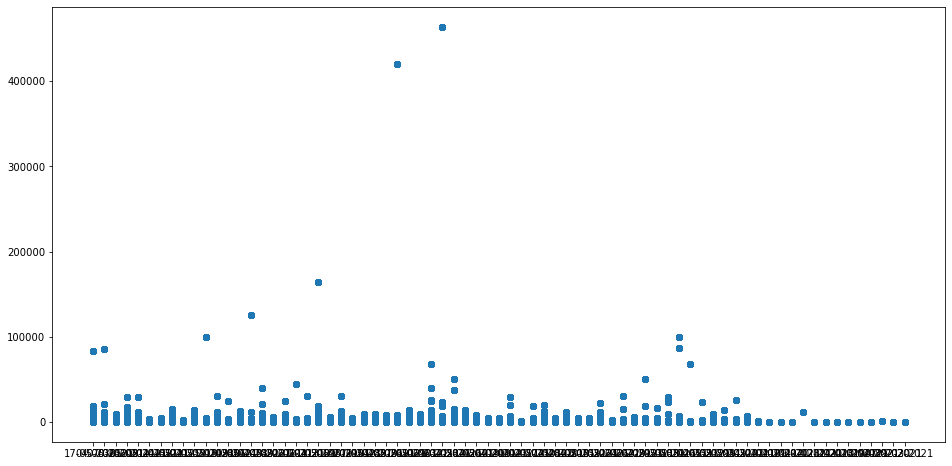

In [408]:

from matplotlib import dates as mpl_dates
plt.figure(figsize=(16,8))
plt.plot_date(as_on_date,transaction_amt)

In [401]:
as_on_date

0           17-05-2021
1           17-05-2021
2           17-05-2021
3           17-05-2021
4           17-05-2021
               ...    
28668659    08-06-2021
28668660    08-06-2021
28668661    08-06-2021
28668662    08-06-2021
28668663    08-06-2021
Name: tran_date, Length: 28668664, dtype: object

In [402]:
df_c1['tran_date'] = pd.to_datetime(df_c1['tran_date'])
df_c1.sort_values('tran_date',inplace=True)

In [ ]:
plt.plot_date(as_on_date,transaction_amt,linestyle='solid')

In [410]:
df_c1.groupby(['party_id','tran_date'])['tran_val'].agg(['max','min','count','mean','sum'])

max     min  count        mean  \
party_id                   tran_date                                       
0018536E0B152D2FF5F9965179 2021-01-05  117.26 -575.20   1806  -36.313654   
                           2021-01-06  117.26 -575.20   2408  -36.313654   
                           2021-02-05  117.26 -575.20    301  -36.313654   
                           2021-02-06  117.26 -575.20   2408  -36.313654   
                           2021-03-05  117.26 -575.20    903  -36.313654   
...                                       ...     ...    ...         ...   
F9D4F54FC533E263075768D13E 2021-09-05   -5.70 -965.79   1420 -261.581444   
                           2021-09-06   -5.70 -965.79    284 -261.581444   
                           2021-10-05   -5.70 -965.79   1136 -261.581444   
                           2021-11-06   -5.70 -965.79    568 -261.581444   
                           2021-12-05   -5.70 -965.79   3692 -261.581444   

                                             sum  
party_id                   tran_date              
0018536E0B152D2FF5F9965179 2021-01-05  -65582.46  
                           2021-01-06  -87443.28  
                           2021-02-05  -10930.41  
                           2021-02-06  -87443.28  
                           2021-03-05  -32791.23  
...                                          ...  
F9D4F54FC533E263075768D13E 2021-09-05 -371445.65  
                           2021-09-06  -74289.13  
                           2021-10-05 -297156.52  
                           2021-11-06 -148578.26  
                           2021-12-05 -965758.69  

[6187 rows x 5 columns]